<a href="https://colab.research.google.com/github/hamf99/ecommerce-public-dataset/blob/main/Data_Analysis_Project_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- Nama: Ilham Fadilah
- Email: fadilahilham1999@gmail.com
- Id Dicoding: hamf99

## Menentukan Pertanyaan Bisnis

1. Bagaimana penyebaran dari pelanggan berdasarkan kota dan negara bagian, serta pelanggan mana yang paling sering melakukan order?
2. Bagaimana penyebaran dari penjual berdasarkan kota dan negara bagian, serta penjual mana yang menjual produk paling banyak?
3. Kategori produk apa saja yang paling banyak dan yang paling sedikit dipesan?
4. Bagaimana karakteristik dan perkembangan order pelanggan dari waktu ke waktu?
5. Pelanggan mana yang merupakan pelanggan terbaik, serta bagaimana segmentasi pada pelanggan berdasarkan pesanan terakhirnya, frekuensi order, dan total nilai ordernya?

## Menyaipkan semua library yang dibutuhkan

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Sumber data: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [186]:
#Mengambil data dari github dan assign ke dalam variabel customers_df
customers_df = pd.read_csv('https://raw.githubusercontent.com/hamf99/ecommerce-public-dataset/main/data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [187]:
#Mengambil data dari github dan assign ke dalam variabel orders_df
orders_df = pd.read_csv('https://raw.githubusercontent.com/hamf99/ecommerce-public-dataset/main/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [188]:
#Mengambil data dari github dan assign ke dalam variabel order_items_df
order_items_df = pd.read_csv('https://raw.githubusercontent.com/hamf99/ecommerce-public-dataset/main/data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [189]:
#Mengambil data dari github dan assign ke dalam variabel sellers_df
sellers_df = pd.read_csv('https://raw.githubusercontent.com/hamf99/ecommerce-public-dataset/main/data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [190]:
#Mengambil data dari github dan assign ke dalam variabel products_df
products_df = pd.read_csv('https://raw.githubusercontent.com/hamf99/ecommerce-public-dataset/main/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [191]:
#Mengambil data dari github dan assign ke dalam variabel products_translate_df
products_translate_df = pd.read_csv('https://raw.githubusercontent.com/hamf99/ecommerce-public-dataset/main/data/product_category_name_translation.csv')
products_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [192]:
#Melakukan joining kedua tabel orders_df dan customers_df
joined_df1 = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left", #Agar terpilih customer yang melakukan order
    left_on="customer_id",
    right_on="customer_id"
)
print('Jumlah baris dan kolom joined_df1:', joined_df1.shape)
joined_df1.head()

Jumlah baris dan kolom joined_df1: (99441, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [193]:
#Melakukan joining keempat tabel order_items_df, sellers_df, products_df, dan products_translate_df
joined_df2 = pd.merge(
    pd.merge( #Tabel hasil join  order_items_df & sellers_df
        order_items_df, sellers_df,
        how = "left", on='seller_id'
        ),
    pd.merge( #Tabel hasil join  products_df & products_translate_df
        products_df, products_translate_df,
        how = "left",
        on='product_category_name'
        ),
    how="left",
    on="product_id"
    )
print('Jumlah baris dan kolom joined_df2:', joined_df2.shape)
joined_df2.head()

Jumlah baris dan kolom joined_df2: (112650, 19)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


### Assessing Data

In [194]:
#Mengecek duplikasi data dan melihat info tabel joined_df1
print('Jumlah duplikasi data: ', joined_df1.duplicated().sum())
joined_df1.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usa

Tabel tidak terdapat duplikasi data dan data tidak lengkap pada beberapa kolom, serta terdapat kesalahan tipe data pada kolom tanggal.

In [195]:
#Mengecek jumlah missing value pada tabel orders_df
joined_df1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Masih terdapat missing value, tetapi hanya pada kolom tanggal. Dapat disebabkan karena terdapat perbedaan pada order_status.

In [196]:
#Melihat deskripsi statistik tabel joined_df1
joined_df1.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99281,97658,96476,99441,99441,99441.000000,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96478,3,9,47,3,522,17,NaN,15540,41746
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58900.000000,NaN,NaN


Nama kota tidak menggunakan huruf kapital dan nama negara bagian masih disingkat.




In [197]:
#Mengecek duplikasi data dan melihat info tabel joined_df2
print('Jumlah duplikasi data: ', joined_df2.duplicated().sum())
joined_df2.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   seller_zip_code_prefix         112650 non-null  int64  
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  product_category_name          111047 non-null  object 
 11  product_name_lenght            111047 non-null  float64
 12  prod

Tabel tidak terdapat duplikasi data dan data tidak lengkap pada beberapa kolom

In [198]:
#Mengecek jumlah missing value pada tabel joined_df2
joined_df2.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

Memiliki kolom yang missing value yang tidak merata pada bagian product_category_name (bahasa Portugis) dan product_category_name_english (bahasa Inggris)

In [199]:
#Melihat deskripsi statistik tabel joined_df2
joined_df2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650.0,NaN,NaN,NaN,1.197834,0.705124,1.0,1.0,1.0,1.0,21.0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68
seller_zip_code_prefix,112650.0,NaN,NaN,NaN,24439.170431,27596.030909,1001.0,6429.0,13568.0,27930.0,99730.0
seller_city,112650,611,sao paulo,27983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,112650,23,SP,80342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data pada kolom price memiliki nilai minimum 0,85 dan nilai maksimum 6.735, serta fright_value memiliki nilai minimum 0 dan nilai maksimum 409,68. Kolom product_name_length s.d. product_width_cm tidak akan dibutuhkan, sehingga kolom tersebut akan dihapus. Penulisan product_category_name_english masih menggunakan huruf kecil dan separator underscore (_).

### Cleaning Data

In [200]:
#Memberikan huruf kapital pada awal huruf setiap kata di kolom customer_city
city_name = []
for i in range(0, len(joined_df1["customer_city"])):
  a = " ".join([s.capitalize() if s.lower() not in "da|de|do|das|dos" else s for s in joined_df1["customer_city"][i].split()])
  city_name.append(a)

joined_df1["customer_city"] = pd.DataFrame(city_name)

In [201]:
#Memberikan huruf kapital pada awal huruf setiap kata di kolom seller_city
seller_city_name = []
for i in range(0, len(joined_df2["seller_city"])):
  a = " ".join([s.capitalize() if s.lower() not in "da|de|do|das|dos" else s for s in joined_df2["seller_city"][i].split()])
  seller_city_name.append(a)

joined_df2["seller_city"] = pd.DataFrame(seller_city_name)

In [202]:
#Memberikan kepanjangan nama dari kolom customer_state dan seller_state (diambil dari situs https://www.drupal.org/node/2559551)
state_name = {
"AC" : "Acre",
"AL" : "Alagoas",
"AM" : "Amazonas",
"AP" : "Amapa",
"BA" : "Bahia",
"CE" : "Ceara",
"DF" : "Distrito Federal",
"ES" : "Espirito Santo",
"GO" : "Goias",
"MA" : "Maranhao",
"MG" : "Minas Gerais",
"MS" : "Mato Grosso do Sul",
"MT" : "Mato Grosso",
"PA" : "Para",
"PB" : "Paraiba",
"PE" : "Pernambuco",
"PI" : "Piaui",
"PR" : "Parana",
"RJ" : "Rio de Janeiro",
"RN" : "Rio Grande do Norte",
"RO" : "Rondonia",
"RR" : "Roraima",
"RS" : "Rio Grande do Sul",
"SC" : "Santa Catarina",
"SE" : "Sergipe",
"SP" : "Sao Paulo",
"TO" : "Tocantins"
}

joined_df1['customer_state'] = joined_df1['customer_state'].map(state_name)
joined_df2['seller_state'] = joined_df2['seller_state'].map(state_name)
joined_df1[['customer_city','customer_state']].head()

,customer_city,customer_state
0,Sao Paulo,Sao Paulo
1,Barreiras,Bahia
2,Vianopolis,Goias
3,Sao Goncalo do Amarante,Rio Grande do Norte
4,Santo Andre,Sao Paulo


In [203]:
joined_df2[['seller_city','seller_state']].head()

,seller_city,seller_state
0,Volta Redonda,Sao Paulo
1,Sao Paulo,Sao Paulo
2,Borda da Mata,Minas Gerais
3,Franca,Sao Paulo
4,Loanda,Parana


Data pada kolom 'customer_city' dan 'customer_state' di tabel 'joined_df1', serta 'seller_city' dan 'seller_state' pada joined_df2 telah sesuai dengan kaidah penulisan.

In [204]:
#Mengganti nama kolom tanggal yang dibutuhkan nanti agar penulisannya lebih singkat
joined_df1 = joined_df1.rename(columns={"order_purchase_timestamp": "order_date",
                                        "order_approved_at": "approved_date",
                                        "order_delivered_carrier_date": "shipped_date",
                                        "order_delivered_customer_date": "delivery_date"}
                               )

In [205]:
#Menghapus kolom yang tidak dibutuhkan yaitu kolom 'customer_zip_code_prefix'
joined_df1 = joined_df1.drop(columns= ['customer_zip_code_prefix','order_estimated_delivery_date'], axis=1)

In [206]:
#Mengubah tipe data yang semula objects menjadi datetime dengan for
dt_columns = ['order_date', 'approved_date', 'shipped_date', 'delivery_date']

for column in dt_columns:
  joined_df1[column] = pd.to_datetime(joined_df1[column])

joined_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            99441 non-null  object        
 1   customer_id         99441 non-null  object        
 2   order_status        99441 non-null  object        
 3   order_date          99441 non-null  datetime64[ns]
 4   approved_date       99281 non-null  datetime64[ns]
 5   shipped_date        97658 non-null  datetime64[ns]
 6   delivery_date       96476 non-null  datetime64[ns]
 7   customer_unique_id  99441 non-null  object        
 8   customer_city       99441 non-null  object        
 9   customer_state      99441 non-null  object        
dtypes: datetime64[ns](4), object(6)
memory usage: 10.4+ MB


In [207]:
print("Jumlah NaN pada kolom 'product_category_name_english':", joined_df2.product_category_name_english.isnull().sum())
print("Jumlah NaN pada kolom 'product_category_name_english', tapi tidak NaN pada kolom 'product_category_name':",
      joined_df2.product_category_name_english.loc[joined_df2.product_category_name_english.isna() &
                                                   joined_df2.product_category_name.notnull()].isnull().sum())

#Melihat nilai unik pada kolom 'product_category_name' yang tidak memiliki nilai pada kolom 'product_category_name_english'
joined_df2.product_category_name.loc[joined_df2.product_category_name_english.isna() & joined_df2.product_category_name.notnull()].unique()

Jumlah NaN pada kolom 'product_category_name_english': 1627
Jumlah NaN pada kolom 'product_category_name_english', tapi tidak NaN pada kolom 'product_category_name': 24


array(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

In [208]:
joined_df2[['product_category_name','product_category_name_english']].loc[joined_df2.product_category_name.isna()].reset_index()

,index,product_category_name,product_category_name_english
0,123,NaN,NaN
1,125,NaN,NaN
2,132,NaN,NaN
3,142,NaN,NaN
4,171,NaN,NaN
...,...,...,...
1598,112306,NaN,NaN
1599,112333,NaN,NaN
1600,112350,NaN,NaN
1601,112438,NaN,NaN


Terdapat 1603 baris yang missing value pada kedua kolom yaitu product_category_name	dan product_category_name_english.

In [209]:
#Melakukan looping pada list index hasil slicing dan mengisi missing value dengan kondisi dari kolom product_category_name
for i in list(joined_df2.loc[joined_df2.product_category_name_english.isna()].index):
  if joined_df2['product_category_name'].iloc[i] == 'pc_gamer':
    joined_df2['product_category_name_english'].iloc[i] = 'pc_gaming'
  elif joined_df2['product_category_name'].iloc[i] == 'portateis_cozinha_e_preparadores_de_alimentos':
    joined_df2['product_category_name_english'].iloc[i] = 'portable_kitchen_and_food_preparers'
  else:
    joined_df2['product_category_name_english'].iloc[i] = 'other_products' #yang masih missing value dalam kolom ini diberi nama other_products

<ipython-input-209-09fc2c49d393>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df2['product_category_name_english'].iloc[i] = 'other_products' #yang masih missing value dalam kolom ini diberi nama other_products
<ipython-input-209-09fc2c49d393>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df2['product_category_name_english'].iloc[i] = 'portable_kitchen_and_food_preparers'
<ipython-input-209-09fc2c49d393>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [210]:
'''
Memperbaiki tata penulisan kolom product_category_name_english dengan menghilangkan separator '_' dan
memberikan huruf kapital di awal huruf setiap kata, serta di-assign ke dalam kolom baru bernama product_category
'''
category_name = []
for i in range(0, len(joined_df2["product_category_name_english"])):
  a = " ".join([s.capitalize() if s.lower() != "and" else s for s in joined_df2["product_category_name_english"][i].split("_")])
  category_name.append(a)

joined_df2["product_category"] = pd.DataFrame(category_name)
joined_df2[["product_category_name_english","product_category"]].head()

,product_category_name_english,product_category
0,cool_stuff,Cool Stuff
1,pet_shop,Pet Shop
2,furniture_decor,Furniture Decor
3,perfumery,Perfumery
4,garden_tools,Garden Tools


In [211]:
#Mengecek jumlah missing value
joined_df2.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english       0
product_category                    0
dtype: int64

In [212]:
#Menghapus kolom yang tidak dibutuhkan dan mengecek kembali jumlah missing value
joined_df2 = joined_df2.drop(joined_df2.columns[[4,7]] ,axis=1).drop(joined_df2.iloc[:, 10:19] ,axis=1)
joined_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   freight_value     112650 non-null  float64
 6   seller_city       112650 non-null  object 
 7   seller_state      112650 non-null  object 
 8   product_category  112650 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 12.6+ MB


Data tabel joined_df2 telah bersih dan siap digabung menjadi satu tabel

In [213]:
#Menggabungkan seluruh tabel ke dalam all_joined_df
all_joined_df = pd.merge(
    left=joined_df1,
    right=joined_df2,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
print('Jumlah baris dan kolom all_joined_df:', all_joined_df.shape)
all_joined_df.head()

Jumlah baris dan kolom all_joined_df: (112650, 18)


,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,Campos dos Goytacazes,Rio de Janeiro,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,Volta Redonda,Sao Paulo,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe do Sul,Sao Paulo,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,Sao Paulo,Sao Paulo,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,Para de Minas,Minas Gerais,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Borda da Mata,Minas Gerais,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,Atibaia,Sao Paulo,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,Franca,Sao Paulo,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,Sao Paulo,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,Loanda,Parana,Garden Tools


In [214]:
#Menambah kolom baru bernama total_order_value hasil penjumlahan kolom price dan freight_value diletakkan pada index setelah kedua kolom tersebut
all_joined_df.insert(15, "total_order_value", all_joined_df.price + all_joined_df.freight_value)

In [215]:
#Mellihat info kolom tabel all_joined_df
all_joined_df.info()
print('\nJumlah missing value all_joined_df:\n', all_joined_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            112650 non-null  object        
 1   customer_id         112650 non-null  object        
 2   order_status        112650 non-null  object        
 3   order_date          112650 non-null  datetime64[ns]
 4   approved_date       112635 non-null  datetime64[ns]
 5   shipped_date        111456 non-null  datetime64[ns]
 6   delivery_date       110196 non-null  datetime64[ns]
 7   customer_unique_id  112650 non-null  object        
 8   customer_city       112650 non-null  object        
 9   customer_state      112650 non-null  object        
 10  order_item_id       112650 non-null  int64         
 11  product_id          112650 non-null  object        
 12  seller_id           112650 non-null  object        
 13  price               112650 no

Meskipun terdapat missing value pada banyak kolom tanggal, tetapi yang menjadi fokus kali ini yaitu kolom order_date karena kolom tersebut akan dipakai kemudian dalam analisis RFM.

In [216]:
#Melihat jumlah unik dari order_status
all_joined_df.order_status.value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

Status order yang akan dianalisis hanya merupakan order yang disetujui sampai produk diterima pelanggan, sehingga order_status yang dibatalkan (canceled) dan tidak tersedia (unavailable) akan dihapus dari tabel.

In [217]:
#Menghapus baris dalam all_joined_df yang mengandung nilai 'canceled' dan 'unavailable' pada kolom order_status
all_joined_df = all_joined_df.drop(all_joined_df[all_joined_df['order_status'].isin(['canceled', 'unavailable'])].index)
all_joined_df.sample(5)

,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,total_order_value,seller_city,seller_state,product_category
39769,5a7ca318214b5a70fd94e277af9643f1,9184be9401fc9b2bf61cf71bc64e8a2e,delivered,2017-11-24 21:18:54,2017-11-25 00:16:48,2017-11-27 22:13:30,2017-12-12 22:52:02,418b52303f8ba25bdf11d39ae6512ecf,Niteroi,Rio de Janeiro,1,bc055ae94989497c0d66bfa4263ccf61,1c68394e931a64f90ea236c5ea590300,57.52,16.84,74.36,Sarandi,Parana,Computers Accessories
3333,077ba6845168434024e83698d3f8fcae,b7316a502ebd69f8b4def2170d89e5b7,delivered,2018-03-03 14:00:36,2018-03-03 14:15:27,2018-03-06 23:24:01,2018-03-28 02:55:41,a78fe1a6ff01727b77a4070a49d783b2,Rio de Janeiro,Rio de Janeiro,1,9831e59284189574c8b3dde0265e5230,12b9676b00f60f3b700e83af21824c0e,238.00,19.91,257.91,Montenegro,Rio Grande do Sul,Cool Stuff
21846,31e919190f59dd6dde547000ab20a612,f6e64070970103cd567436eb89a2ea55,delivered,2017-08-05 18:24:31,2017-08-06 06:43:35,2017-08-08 18:07:02,2017-08-23 18:53:45,1828417f59821953b154b31e45a02a38,Juazeiro do Norte,Ceara,1,88dd63919fc9ab693803578a04a20209,7ddcbb64b5bc1ef36ca8c151f6ec77df,34.99,25.63,60.62,Sao Paulo,Sao Paulo,Computers Accessories
44759,65c3a33271e3070af95cc3c03018871d,d09912ab4d57d91188059d6217cff2ca,delivered,2017-12-07 18:18:43,2017-12-07 19:00:28,2017-12-11 19:37:04,2018-01-05 17:25:45,66081efeaa75cfe676170431bca81afe,Sao Joao de Meriti,Rio de Janeiro,1,5d66715cc928aadd0074f61332698593,128639473a139ac0f3e5f5ade55873a5,19.90,16.79,36.69,Maringa,Parana,Electronics
87542,c6c503c80e66a33d6e643178cd943e7b,7e153c1fcfdae18b86e15bead9915409,delivered,2017-07-02 20:48:48,2017-07-02 21:03:55,2017-07-05 10:07:32,2017-07-14 20:27:50,99c3cd03f2cb4e199ec4df6691116ddd,Arroio dos Ratos,Rio Grande do Sul,1,7c1bd920dbdf22470b68bde975dd3ccf,cc419e0650a3c5ba77189a1882b7556a,54.99,16.63,71.62,Santo Andre,Sao Paulo,Health Beauty


In [218]:
#Melihat jumlah unik dari order_status
all_joined_df.order_status.value_counts()

delivered     110197
shipped         1185
invoiced         359
processing       357
approved           3
Name: order_status, dtype: int64

In [219]:
#Mengecek jumlah missing value all_joined_df setelah drop baris dengan order_status canceled dan unavailable
all_joined_df.isna().sum()

order_id                 0
customer_id              0
order_status             0
order_date               0
approved_date           15
shipped_date           721
delivery_date         1912
customer_unique_id       0
customer_city            0
customer_state           0
order_item_id            0
product_id               0
seller_id                0
price                    0
freight_value            0
total_order_value        0
seller_city              0
seller_state             0
product_category         0
dtype: int64

In [220]:
#Membuat kolom baru dengan menggunakan kolom order_date dari all_joined_df
all_joined_df.insert(3,'hour_order', all_joined_df['order_date'].apply(lambda x: x.hour)) #insert kolom 'hour_order' di index ke-3

hours_bins = [-0.1, 6, 12, 18, 23] #Membagi kolom hour_order ke dalam beberapa bagian
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
all_joined_df.insert(4,'daytime_order', (pd.cut(all_joined_df['hour_order'], hours_bins, labels=hours_labels))) #insert kolom 'daytime_order' di index ke-4

all_joined_df.insert(5,'day_order', all_joined_df['order_date'].dt.strftime('%A')) #insert kolom 'day_order' di index ke-5
all_joined_df.insert(6,'date_order', all_joined_df['order_date'].dt.strftime('%d')) #insert kolom 'date_order' di index ke-6
all_joined_df.insert(7,'month_order', all_joined_df['order_date'].dt.strftime('%m-%Y')) #insert kolom 'month_order' di index ke-7

all_joined_df.sample(10)

,order_id,customer_id,order_status,hour_order,daytime_order,day_order,date_order,month_order,order_date,approved_date,...,customer_state,order_item_id,product_id,seller_id,price,freight_value,total_order_value,seller_city,seller_state,product_category
19211,2c2a19b5703863c908512d135aa6accc,0d93f21f3e8543a9d0d8ece01561f5b2,delivered,20,Night,Monday,09,10-2017,2017-10-09 20:45:45,2017-10-11 03:26:49,...,Minas Gerais,6,03e1c946c0ddfc58724ff262aef08dff,98dac6635aee4995d501a3972e047414,20.70,16.11,36.81,Sao Paulo,Sao Paulo,Housewares
90028,cc8454f08599794be25a95f691617e11,76039dcbd685693ff99e90d7c572775c,delivered,22,Night,Monday,25,06-2018,2018-06-25 22:04:06,2018-06-26 20:10:19,...,Sao Paulo,1,26b2a480ced2900a62bb9431133e95aa,d6b1ce66b035a475f00c017792ff9769,113.30,15.10,128.40,Salto,Sao Paulo,Construction Tools Lights
54057,7aea47643f83c856db4ceee0830f39da,b9a421e93374ddb8c87d13b87c5627ac,delivered,11,Morning,Wednesday,09,05-2018,2018-05-09 11:41:29,2018-05-09 11:55:23,...,Santa Catarina,2,8173ca41cdb176462f9ae79821a48404,d566c37fa119d5e66c4e9052e83ee4ea,35.90,18.23,54.13,Sao Paulo,Sao Paulo,Sports Leisure
21545,314b1e0bb8736164596117c457a74db8,306cec97b910365317da80598f923435,delivered,10,Morning,Monday,05,03-2018,2018-03-05 10:52:53,2018-03-05 11:40:28,...,Sao Paulo,1,fcfe8ebda270478afa5867ec5e46e7be,0adac9fbd9a2b63cccaac4f8756c1ca8,41.90,11.85,53.75,Louveira,Sao Paulo,Housewares
67801,9b015744ffb8748e8888aa87144186a1,b7fd83bf8017a1700dda8bcc37199759,delivered,21,Night,Monday,02,07-2018,2018-07-02 21:40:58,2018-07-02 21:55:18,...,Distrito Federal,1,a5dd94755306eb7c9b5b66d371a09144,7d13fca15225358621be4086e1eb0964,370.00,20.69,390.69,Ribeirao Preto,Sao Paulo,Watches Gifts
12162,1b9b3a976302524d2f05a417b095afb1,bd1b88786f972966bf49b41f47fb09ba,delivered,20,Night,Friday,01,12-2017,2017-12-01 20:54:52,2017-12-01 21:32:29,...,Minas Gerais,1,045c0f3faa3d81ff1af071e0811b2711,fa1c13f2614d7b5c4749cbc52fecda94,179.91,15.01,194.92,Sumare,Sao Paulo,Watches Gifts
9868,169f444739d294d19e4103e460d963d4,8f0f359a835944478c1c46f14fb5f2c3,delivered,21,Night,Sunday,21,01-2018,2018-01-21 21:25:43,2018-01-22 14:00:22,...,Bahia,2,186fe07c8b8005ec6a498587ffbc1352,6560211a19b47992c3666cc44a7e94c0,29.00,16.79,45.79,Sao Paulo,Sao Paulo,Watches Gifts
81636,b989c3785c2432d0617d9e494703c478,7a60d482d82b2ff409a49d3c0529048d,delivered,13,Afternoon,Saturday,28,07-2018,2018-07-28 13:11:06,2018-07-28 14:30:30,...,Minas Gerais,1,bb3c156467b262f4c99996ded3351eee,e62b2d6ac10570a035a30bafcf01d263,49.90,23.15,73.05,Sao Paulo,Sao Paulo,Housewares
83771,be40ba471371fdea735b41499c8655c7,0c9a4971a6b2319c83049f113fb2eb48,delivered,9,Morning,Monday,02,10-2017,2017-10-02 09:21:04,2017-10-03 04:14:24,...,Espirito Santo,2,a35ea299fbf8fc63d9faa23b77bf3eaf,bba74270a87732727b5a3b4fd9ac1c39,44.99,18.59,63.58,Betim,Minas Gerais,Sports Leisure
7589,11355704acdff0fa62bd66796b8dcc88,5aebdad3dd4f042c40f72ea74510d12e,delivered,11,Morning,Thursday,26,04-2018,2018-04-26 11:48:29,2018-04-26 12:11:07,...,Bahia,1,c1617123e66d2491ca93ceadfd36203e,b2479f944e1b90cf8a5de1bbfde284d6,49.99,23.28,73.27,Ibitinga,Sao Paulo,Bed Bath Table


Data dari all_joined df siap digunakan untuk dieksplorasi dan dianalisis

## Exploratory Data Analysis (EDA)

Untuk eksplorasi dan visualisasi data, data pelanggan yang digunakan berasal dari kolom **customer_unique_id**, karena kolom tersebut menggambarkan pelanggan yang melakukan kembali di toko. Berdasarkan keterangan dari situs [kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv), setiap pesanan ditetapkan ke customer_id yang unik, artinya pelanggan yang sama akan mendapatkan id berbeda untuk pesanan berbeda.

### Karakteristik Pelanggan

In [221]:
#Melihat jumlah pelanggan berdasarkan customer_city
customers_in_cities = all_joined_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_cities.head(10)

,customer_city,customer_unique_id
0,Sao Paulo,14761
1,Rio de Janeiro,6545
2,Belo Horizonte,2641
3,Brasilia,2051
4,Curitiba,1447
5,Campinas,1379
6,Porto Alegre,1317
7,Salvador,1199
8,Guarulhos,1133
9,Sao Bernardo do Campo,891


Pelanggan yang bertransaksi paling banyak berada pada kota Sao Paulo sebanyak 14.761 orang

In [222]:
#Melihat jumlah pelanggan berdasarkan customer_state
customers_in_states = all_joined_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_states.head(10)

,customer_state,customer_unique_id
0,Sao Paulo,39747
1,Rio de Janeiro,12241
2,Minas Gerais,11134
3,Rio Grande do Sul,5233
4,Parana,4824
5,Santa Catarina,3501
6,Bahia,3244
7,Distrito Federal,2057
8,Espirito Santo,1950
9,Goias,1934


Jumlah pelanggan terbanyak berada pada negara bagian Sao Paulo sebanyak 39.747 orang

In [223]:
#Melihat pelanggan yang memiliki nilai total order terbanyak
sum_order = all_joined_df.groupby(by="customer_unique_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
sum_order_sorted = sum_order.sort_values(by='sum_order_value', ascending=False).head(10)
sum_order_sorted

,customer_unique_id,count_order,sum_order_value
3788,0a0a92112bd4c708ca5fde585afaa872,1,13664.08
81011,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63
43938,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88
81850,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31
25901,459bef486812aa25204be022145caa62,1,6922.21
94696,ff4159b92c40ebe40454e3e6a7c35ed6,1,6726.66
23841,4007669dec559734d6f53e029e360987,1,6081.54
88651,eebb5dda148d3893cdaf5b5ca3040ccb,1,4764.34
27124,48e1ac109decbb87765a3eade6854098,1,4681.78
74401,c8460e4251689ba205045f3ea17884a1,4,4655.88


Pelanggan dengan ID '0a0a92112bd4c708ca5fde585afaa872' yang memiliki nilai total order tertinggi yaitu sebesar R$13.664,08, meskipun hanya sekali order.

In [224]:
#Melihat pelanggan yang paling sering melakukan order
count_order = all_joined_df.groupby(by="customer_unique_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
count_order_sorted = count_order.sort_values(by=['count_order','sum_order_value'], ascending=False).head(10)
count_order_sorted

,customer_unique_id,count_order,sum_order_value
52352,8d50f5eadf50201ccdcedfb9e2ac8455,16,902.04
23198,3e43e6105506432c953e165fb2acf44c,9,1172.67
75205,ca77025e7201e3b30c44b472ff346268,7,1122.72
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01
37370,6469f99c1f9dfae7733b25662e7f1782,7,758.83
81925,dc813062e0fc23409cd255f7f53c7074,6,1033.62
26733,47c1a3033b8b77b3ab6e109eb4d5fdf3,6,944.21
37161,63cfc61cee11cbe306bff5857d00bfe4,6,826.32
89402,f0e310a6839dce9de1638e0fe5ab282a,6,540.69
7091,12f5d6e1cbf93dafd9dcc19095df0b3d,6,110.72


Pelanggan dengan ID '8d50f5eadf50201ccdcedfb9e2ac8455' yang paling sering melakukan order hingga 16 kali, meskipun nilai total order nya hanya sebesar R$902,94.

### Karakteristik Penjual

In [225]:
#Melihat jumlah penjual berdasarkan seller_city
sellers_in_cities = all_joined_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_cities.head(10)

,seller_city,seller_id
0,Sao Paulo,683
1,Curitiba,126
2,Rio de Janeiro,96
3,Belo Horizonte,65
4,Ribeirao Preto,52
5,Guarulhos,50
6,Ibitinga,49
7,Santo Andre,45
8,Campinas,40
9,Maringa,40


Jumlah penjual terbanyak berasal dari kota Sao Paulo sebanyak 683 orang

In [226]:
#Melihat jumlah penjual berdasarkan seller_state
sellers_in_states = all_joined_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_states.head(10)

,seller_state,seller_id
0,Sao Paulo,1822
1,Parana,344
2,Minas Gerais,240
3,Santa Catarina,186
4,Rio de Janeiro,170
5,Rio Grande do Sul,129
6,Goias,40
7,Distrito Federal,30
8,Espirito Santo,23
9,Bahia,19


Jumlah penjual terbanyak berasal dari negara bagian Sao Paulo sebanyak 1.822 orang

In [227]:
#Melihat penjual yang memiliki nilai total order terbanyak
seller_sum_order = all_joined_df.groupby(by="seller_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
seller_sum_order_sorted = seller_sum_order.sort_values(by='sum_order_value', ascending=False).head(10)
seller_sum_order_sorted

,seller_id,count_order,sum_order_value
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
1515,7c67e1448b00f6e969d365cea6b010ab,982,239536.44
1000,53243585a1d6dc2643021fd1853d8905,358,235856.68
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2984,fa1c13f2614d7b5c4749cbc52fecda94,584,202861.67
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1540,7e93a43ef30c4f03f38b393420bc753a,332,178838.42
191,1025f0e2d44d7041d6cf58b6550e0bfa,915,172860.69
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90


Penjual dengan ID 4869f7a5dfa277a7dca6462dcf3b52b2 memiliki total nilai order tertinggi senilai 249.393,44 Real

In [228]:
#Melihat penjual yang mendapatkan order terbanyak
seller_count_order = all_joined_df.groupby(by="seller_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
seller_count_order_sorted = seller_count_order.sort_values(by=['count_order','sum_order_value'], ascending=False).head(10)
seller_count_order_sorted

,seller_id,count_order,sum_order_value
1219,6560211a19b47992c3666cc44a7e94c0,1847,150522.02
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2451,cc419e0650a3c5ba77189a1882b7556a,1697,129169.95
366,1f50f920176fa81dab994f9023523100,1403,142037.48
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
2800,ea8482cd71df3c1969d7b9473ff13abc,1145,54684.52
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
724,3d871de0142ce09b7081e2b9d1733cb1,1076,116835.80


Penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 mendapatkan order terbanyak sebanyak 1.847 kali

### Order Pelanggan Berdasarkan Kategori Produk

In [229]:
#Melihat kategori produk dengan jumlah order tertinggi
order_by_product_category = all_joined_df.groupby(by="product_category").agg(num_of_order = ('order_id','count'), sum_order_value = ('total_order_value', 'sum')).reset_index()
order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10)


,product_category,num_of_order,sum_order_value
7,Bed Bath Table,11097,1240386.13
43,Health Beauty,9634,1437665.78
68,Sports Leisure,8590,1147244.63
39,Furniture Decor,8298,899626.04
15,Computers Accessories,7781,1050941.58
49,Housewares,6915,772035.14
73,Watches Gifts,5970,1298292.47
71,Telephony,4527,393306.02
42,Garden Tools,4328,579525.20
5,Auto,4204,678606.64


Kategori produk yang paling banyak dipesan yaitu Bed Bath Table sebanyak 11.097 kali pesanan, meskipun total nilai ordernya bukan yang tertinggi.

In [230]:
#Melihat kategori produk dengan jumlah order terendah
order_by_product_category.sort_values('num_of_order', ascending=True).head(10) #Menyortir nilai terendah

,product_category,num_of_order,sum_order_value
64,Security and Services,2,324.51
60,Pc Gaming,8,1430.10
29,Fashion Childrens Clothes,8,665.36
52,La Cuisine,14,2388.54
63,Portable Kitchen and Food Preparers,14,4228.05
11,Cds Dvds Musicals,14,954.99
3,Arts and Craftmanship,24,2184.14
46,Home Comfort 2,30,1170.58
32,Fashion Sport,30,2697.64
35,Flowers,33,1598.91


Kategori produk yang paling sedikit dipesan yaitu Security and Services hanya sebanyak 2 kali pesanan.

In [231]:
#Melihat kategori produk dengan total nilai order tertinggi
order_by_product_category.sort_values('sum_order_value', ascending=False).head(10) #Menyortir nilai tertinggi

,product_category,num_of_order,sum_order_value
43,Health Beauty,9634,1437665.78
73,Watches Gifts,5970,1298292.47
7,Bed Bath Table,11097,1240386.13
68,Sports Leisure,8590,1147244.63
15,Computers Accessories,7781,1050941.58
39,Furniture Decor,8298,899626.04
49,Housewares,6915,772035.14
20,Cool Stuff,3779,704086.24
5,Auto,4204,678606.64
42,Garden Tools,4328,579525.20


Kategori produk Health Beauty memiliki total nilai order tertinggi sebanyak R$ 1.437.665,78 dengan jumlah order yang lebih rendah dari Bed Bath Table.

In [232]:
#Melihat kategori produk dengan total nilai order terendah
order_by_product_category.sort_values('sum_order_value', ascending=True).head(10)

,product_category,num_of_order,sum_order_value
64,Security and Services,2,324.51
29,Fashion Childrens Clothes,8,665.36
11,Cds Dvds Musicals,14,954.99
46,Home Comfort 2,30,1170.58
60,Pc Gaming,8,1430.10
35,Flowers,33,1598.91
23,Diapers and Hygiene,38,2101.25
3,Arts and Craftmanship,24,2184.14
52,La Cuisine,14,2388.54
32,Fashion Sport,30,2697.64


Kategori produk Security and Services memiliki total nilai order terendah sebanyak R$ 324,51

### Karakteristik dan Perkembangan Order Pelanggan

In [233]:
count_hour_order = all_joined_df.groupby('hour_order').order_id.nunique().reset_index()
count_hour_order

,hour_order,order_id
0,0,2362
1,1,1151
2,2,503
3,3,267
4,4,205
5,5,185
6,6,493
7,7,1218
8,8,2939
9,9,4712


Pemesanan terbanyak dilakukan pada pukul 16.00

In [234]:
#Order pelanggan berdasarkan waktu pemesanan
count_daytime_order = all_joined_df.groupby('daytime_order').order_id.nunique().reset_index()
count_daytime_order

,daytime_order,order_id
0,Dawn,5166
1,Morning,27367
2,Afternoon,37664
3,Night,28002


Pemesanan paling banyak dilakukan pada siang hari

In [235]:
#Order pelanggan berdasarkan hari pemesanan
all_joined_df.groupby('day_order').order_id.nunique().reset_index().sort_values(by='order_id', ascending=False)

,day_order,order_id
1,Monday,15978
5,Tuesday,15758
6,Wednesday,15350
4,Thursday,14571
0,Friday,13948
3,Sunday,11831
2,Saturday,10763


Pemesanan paling banyak dilakukan pada hari Senin

In [266]:
#Order pelanggan berdasarkan waktu dan hari pemesanan
count_time_order = all_joined_df.groupby(['day_order','daytime_order']).order_id.nunique().reset_index()
count_time_order.insert(2, 'time_order', count_time_order[['day_order',	'daytime_order']].agg(', '.join, axis=1))
count_time_order.sort_values(by='order_id', ascending=False)

,day_order,daytime_order,time_order,order_id
6,Monday,Afternoon,"Monday, Afternoon",6124
22,Tuesday,Afternoon,"Tuesday, Afternoon",6066
26,Wednesday,Afternoon,"Wednesday, Afternoon",5837
18,Thursday,Afternoon,"Thursday, Afternoon",5587
2,Friday,Afternoon,"Friday, Afternoon",5390
7,Monday,Night,"Monday, Night",4742
23,Tuesday,Night,"Tuesday, Night",4536
25,Wednesday,Morning,"Wednesday, Morning",4522
14,Sunday,Afternoon,"Sunday, Afternoon",4483
21,Tuesday,Morning,"Tuesday, Morning",4466


Pemesanan paling banyak dilakukan pada hari Senin-Jumat di siang hari

In [267]:
count_date_order = all_joined_df.groupby('date_order').order_id.nunique().reset_index()
count_date_order.sort_values(by='order_id', ascending=False)

,date_order,order_id
23,24,3835
15,16,3546
14,15,3485
3,04,3449
5,06,3408
17,18,3405
4,05,3388
13,14,3345
18,19,3340
6,07,3313


Pemesanan terbanyak dilakukan pada tanggal 24, 16, dan 15.

In [238]:
#Melihat perkembangan jumlah pesanan dan nilai total order dari bulan ke bulan
monthly_orders = all_joined_df.resample(rule='M', on='order_date').agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value','sum')).reset_index()
monthly_orders = monthly_orders.rename(columns ={"order_date":"month_order"})
monthly_orders.month_order = monthly_orders.month_order.dt.strftime('%Y-%m')
monthly_orders

,month_order,count_order,sum_order_value
0,2016-09,2,279.69
1,2016-10,290,51354.52
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,787,136943.46
5,2017-02,1718,283561.69
6,2017-03,2617,425617.96
7,2017-04,2377,405848.61
8,2017-05,3640,582710.83
9,2017-06,3205,499652.24


Jumlah pesanan dan nilai total order tertinggi terjadi pada bulan November 2017 dengan jumlah order sebanyak 7421	kali dan total nilai order sebesar 1.172.191,68 Real

### Analisis RFM

Analisis RFM digunakan untuk mengidentifikasi segmen customer yang berbeda berdasarkan perilaku pembelian mereka. Analisis RFM dilakukan berdasarkan parameter berikut

- Recency (R): Berapa lama sejak pelanggan terakhir melakukan pembelian? Nilai recency yang rendah menunjukkan pelanggan tersebut aktif melakukan pemesanan.

- Frequency (F): Berapa kali pelanggan telah melakukan pembelian dalam periode tertentu? Nilai frequency yang tinggi menunjukkan pelanggan tersebut sering melakukan pemesanan.

- Monetary (M): Berapa total uang yang dihabiskan oleh pelanggan? Nilai monetary yang tinggi menunjukkan pelanggan tersebut menghabiskan uang yang lebih banyak dalam melakukan pemesanan.

In [239]:
#Membuat dataset baru bernama rfm_df untuk selanjutnya dilakukan analisis RFM
rfm_df = all_joined_df.groupby(by="customer_unique_id", as_index=False).agg(
    max_order_date = ("order_date", "max"), # mengambil tanggal order terakhir
    frequency = ("order_id", "nunique"), # menghitung jumlah order
    monetary = ("total_order_value", "sum") # menghitung total jumlah uang untuk pemesanan
    )

rfm_df['max_order_date'] = rfm_df['max_order_date'].dt.date #mengubah menjadi format tanggal
recent_order_date = all_joined_df['order_date'].dt.date.max() #memilih hari terakhir dalam kolom order_date
rfm_df.insert(1,'recency', rfm_df['max_order_date'].apply(lambda x: (recent_order_date - x).days)) #mencari selisih kapan terakhir pelanggan bertransaksi
rfm_df.drop('max_order_date', axis=1, inplace=True) #menghapus kolom yang tidak dibutuhkan
rfm_df.head(10)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,136,1,35.38
7,00053a61a98854899e70ed204dd4bafe,187,1,419.18
8,0005e1862207bf6ccc02e4228effd9a0,548,1,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,175,1,129.76


In [240]:
#Melihat deskripsi statistik rfm_df
rfm_df.describe()

,recency,frequency,monetary
count,94983.000000,94983.000000,94983.000000
mean,243.334197,1.033859,165.666772
std,152.984601,0.210811,226.726478
min,0.000000,1.000000,9.590000
25%,119.000000,1.000000,63.100000
50%,224.000000,1.000000,107.900000
75%,352.000000,1.000000,182.930000
max,729.000000,16.000000,13664.080000


Terdapat sebanyak 94.983 pelanggan unik. Di antara semua pelanggan, ada yang bertransaksi terakhir paling lama 729 hari, lalu frekuensi berbelanja paling banyak 16 kali, serta melakukan order dengan nilai minimum order sebesar 9,59 Real dan nilai maksimum order sebesar 13.664,08 Real.

In [241]:
#Melihat pelanggan yang terakhir kali memesan
rfm_df.sort_values(by='recency', ascending=True)

,customer_unique_id,recency,frequency,monetary
94648,ff22e30958c13ffe219db7d711e8f564,0,2,332.92
67207,b4dcade04bc548b7e3b0243c801f8c26,5,1,106.95
45386,7a22d14aa3c3599238509ddca4b93b01,5,1,73.10
67999,b701bebbdf478f5500348f03aff62121,5,1,33.23
65345,afbcfd0b9c5233e7ccc73428526fbb52,5,1,497.25
...,...,...,...,...
50299,87776adb449c551e74c13fc34f036105,700,1,40.95
36463,61db744d2f835035a5625b59350c6b63,700,1,53.73
52320,8d3a54507421dbd2ce0a1d58046826e0,700,1,133.46
48745,830d5b7aaa3b6f1e9ad63703bec97d23,718,1,143.46


In [242]:
#Melihat pelanggan yang sering order
rfm_df.sort_values(by='frequency', ascending=False)

,customer_unique_id,recency,frequency,monetary
52352,8d50f5eadf50201ccdcedfb9e2ac8455,14,16,902.04
23198,3e43e6105506432c953e165fb2acf44c,188,9,1172.67
75205,ca77025e7201e3b30c44b472ff346268,94,7,1122.72
37370,6469f99c1f9dfae7733b25662e7f1782,67,7,758.83
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,959.01
...,...,...,...,...
32120,5650c85bcdef051d8bc16e0771747686,266,1,69.73
32119,5650bf668868651d51740cd49908814e,61,1,14.29
32118,56509f7bc43892a0da09ee14f50a6f84,230,1,211.89
32117,564feb90710b4f84399f931fa97ea704,518,1,330.27


In [243]:
#Melihat pelanggan yang menghabiskan uang paling banyak untuk order
rfm_df.sort_values(by='monetary', ascending=False)

,customer_unique_id,recency,frequency,monetary
3788,0a0a92112bd4c708ca5fde585afaa872,339,1,13664.08
81011,da122df9eeddfedc1dc1f5349a1a690c,520,2,7571.63
43938,763c8b1c9c68a0229c42c9fc6f662b93,50,1,7274.88
81850,dc4802a71eae9be1dd28f5d788ceb526,568,1,6929.31
25901,459bef486812aa25204be022145caa62,40,1,6922.21
...,...,...,...,...
15062,2878e5b88167faab17d4fb83a986d38b,309,1,11.63
41420,6f5b9d1cdccc4d28f0483a612edecacf,366,1,11.63
66604,b33336f46234b24a613ad9064d13106d,74,1,10.89
70229,bd06ce0e06ad77a7f681f1a4960a3cc6,355,1,10.07


## Visualization & Explanatory Analysis

In [244]:
#Membuat fungsi untuk memberikan warna tertentu pada data dengan nilai maksimum
def set_custom_palette(series, max_color = '#3187d4', other_color = '#b3bcc4'):
    max_value = series.max()
    pal = []

    for item in series:
        if item == max_value:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

### Bagaimana penyebaran dari pelanggan berdasarkan kota dan negara bagian, serta pelanggan mana yang paling sering melakukan order?

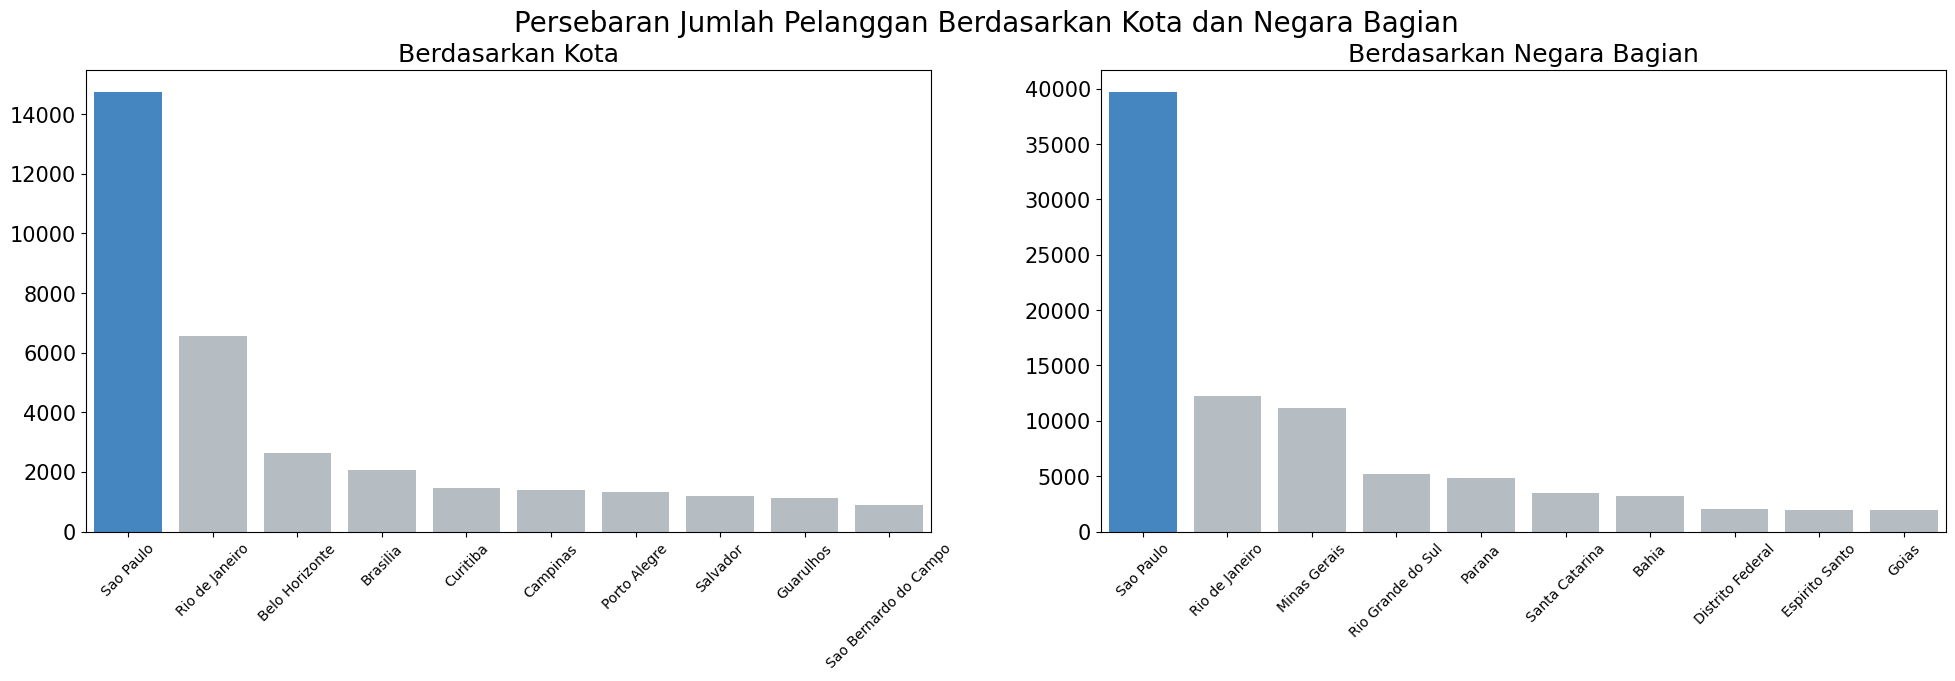

In [245]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="customer_city", y="customer_unique_id", data= customers_in_cities.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="customer_state", y="customer_unique_id", data= customers_in_states.head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Berdasarkan Negara Bagian", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Persebaran Jumlah Pelanggan Berdasarkan Kota dan Negara Bagian", fontsize=20)
plt.show()

Berdasarkan gambar di atas, jumlah pelanggan terbanyak berasal dari kota Sao Paulo dan Rio de Janeiro, serta dari negara bagian Sao Paulo, Rio de Janeiro, dan Minas Gerais.

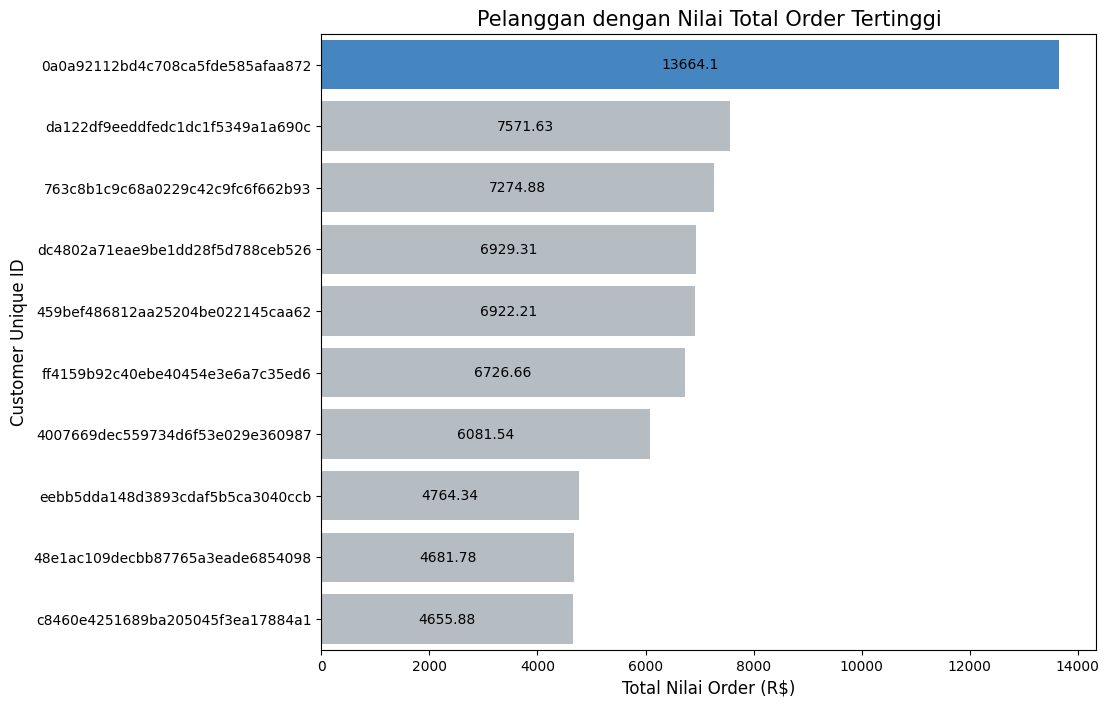

In [246]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="sum_order_value", y="customer_unique_id", data= sum_order_sorted , palette=colors)
ax.set_ylabel('Customer Unique ID', fontsize=12)
ax.set_xlabel('Total Nilai Order (R$)', fontsize=12)
ax.set_title("Pelanggan dengan Nilai Total Order Tertinggi", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

Pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872 melakukan order dengan total nilai order tertinggi dengan nilai sebesar 13.664,1 Real

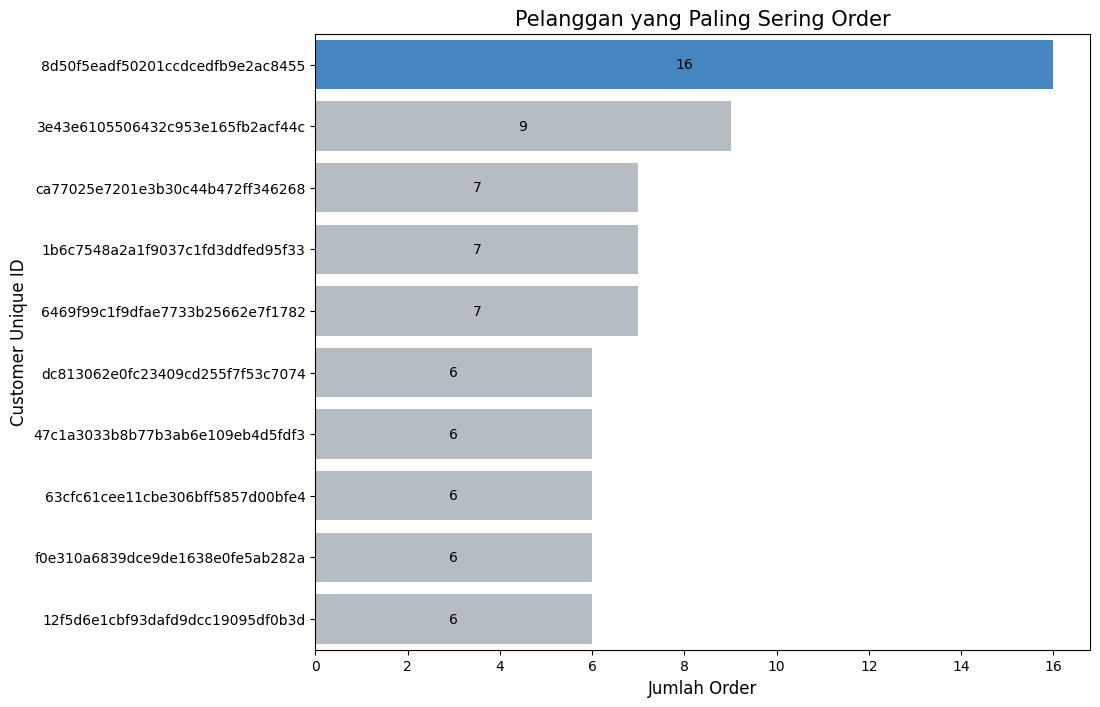

In [247]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="count_order", y="customer_unique_id", data= count_order_sorted, palette=colors)
ax.set_ylabel('Customer Unique ID', fontsize=12)
ax.set_xlabel('Jumlah Order', fontsize=12)
ax.set_title("Pelanggan yang Paling Sering Order", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

Pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 melakukan order paling sering sebanyak 16 kali

### Bagaimana penyebaran dari penjual berdasarkan kota dan negara bagian, serta penjual mana yang menjual produk paling banyak?

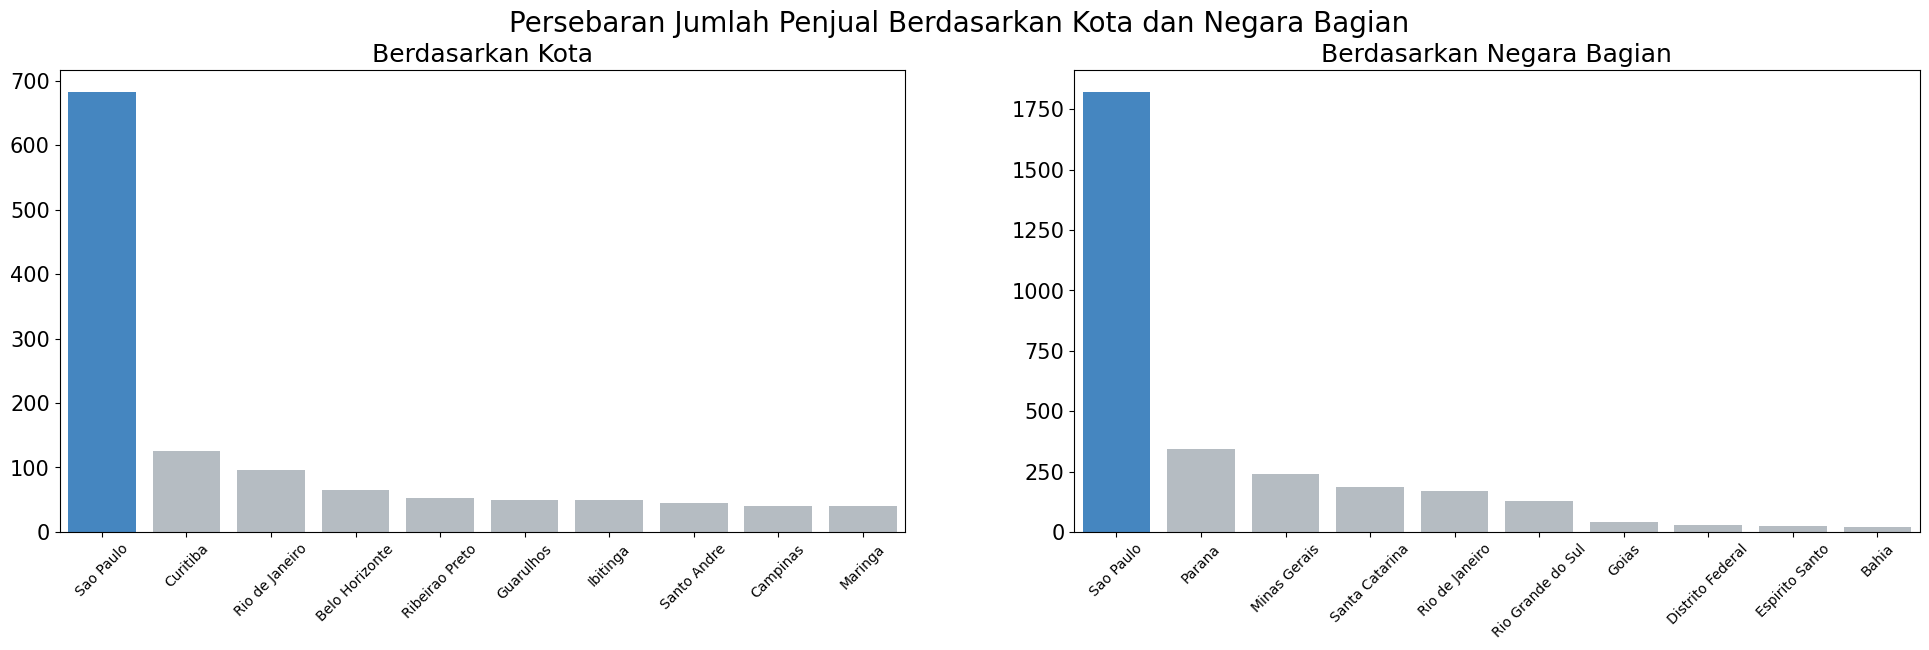

In [248]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="seller_city", y="seller_id", data= sellers_in_cities.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="seller_state", y="seller_id", data= sellers_in_states.head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Berdasarkan Negara Bagian", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Persebaran Jumlah Penjual Berdasarkan Kota dan Negara Bagian", fontsize=20)
plt.show()

Jumlah penjual paling banyak tersebar di kota Sao Paulo dan Curitiba, serta di negara bagian Sao Paulo, Parana, dan Minas Gerais.

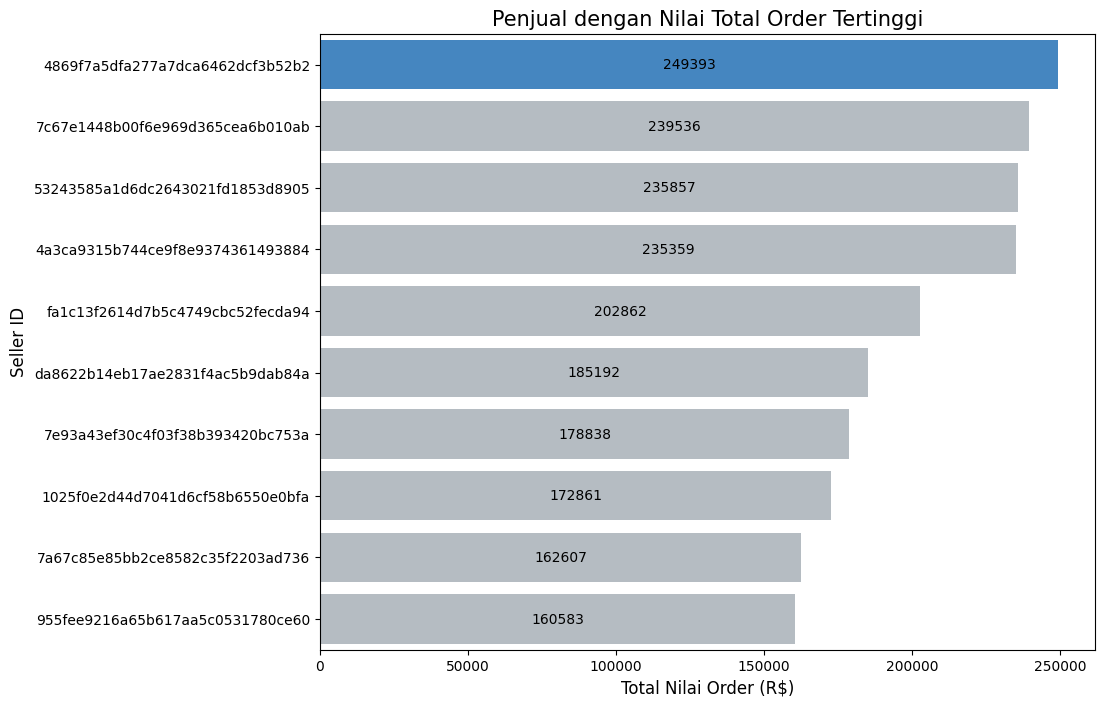

In [249]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="sum_order_value", y="seller_id", data= seller_sum_order_sorted , palette=colors)
ax.set_ylabel('Seller ID', fontsize=12)
ax.set_xlabel('Total Nilai Order (R$)', fontsize=12)
ax.set_title("Penjual dengan Nilai Total Order Tertinggi", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

Penjual dengan ID 4869f7a5dfa277a7dca6462dcf3b52b2 memiliki total nilai order tertinggi senilai 249.393 Real

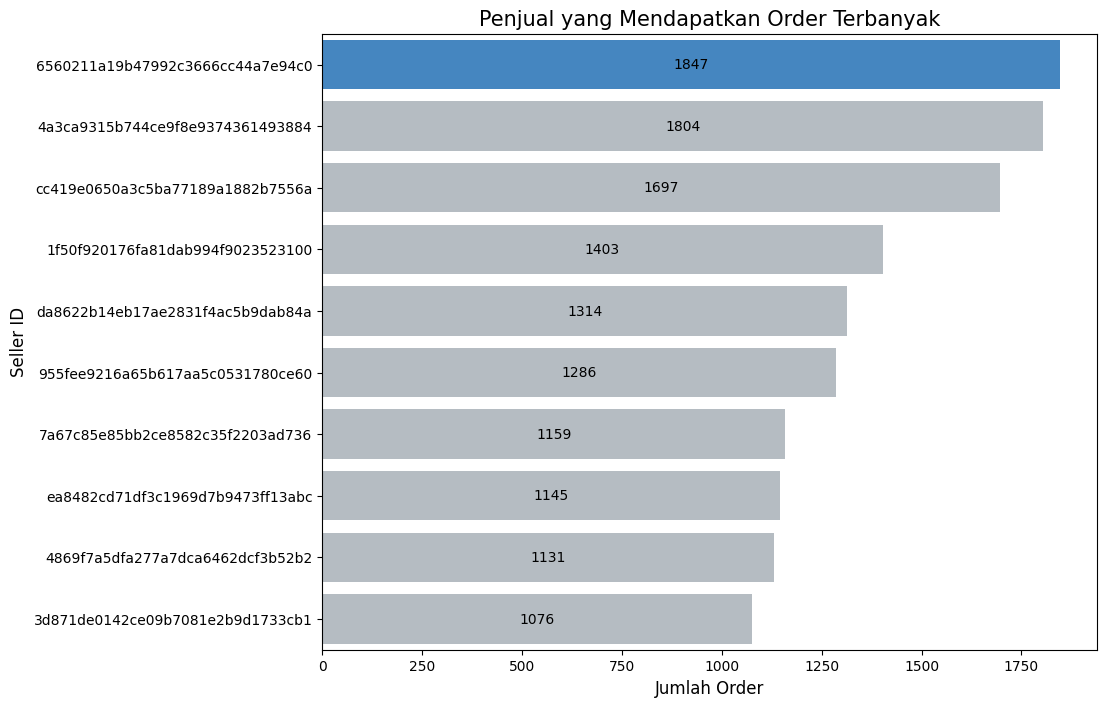

In [250]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="count_order", y="seller_id", data= seller_count_order_sorted, palette=colors)
ax.set_ylabel('Seller ID', fontsize=12)
ax.set_xlabel('Jumlah Order', fontsize=12)
ax.set_title("Penjual yang Mendapatkan Order Terbanyak", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

Penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 mendapatkan order terbanyak sebanyak 1.847 kali

### Kategori produk apa saja yang paling banyak dan yang paling sedikit dipesan?

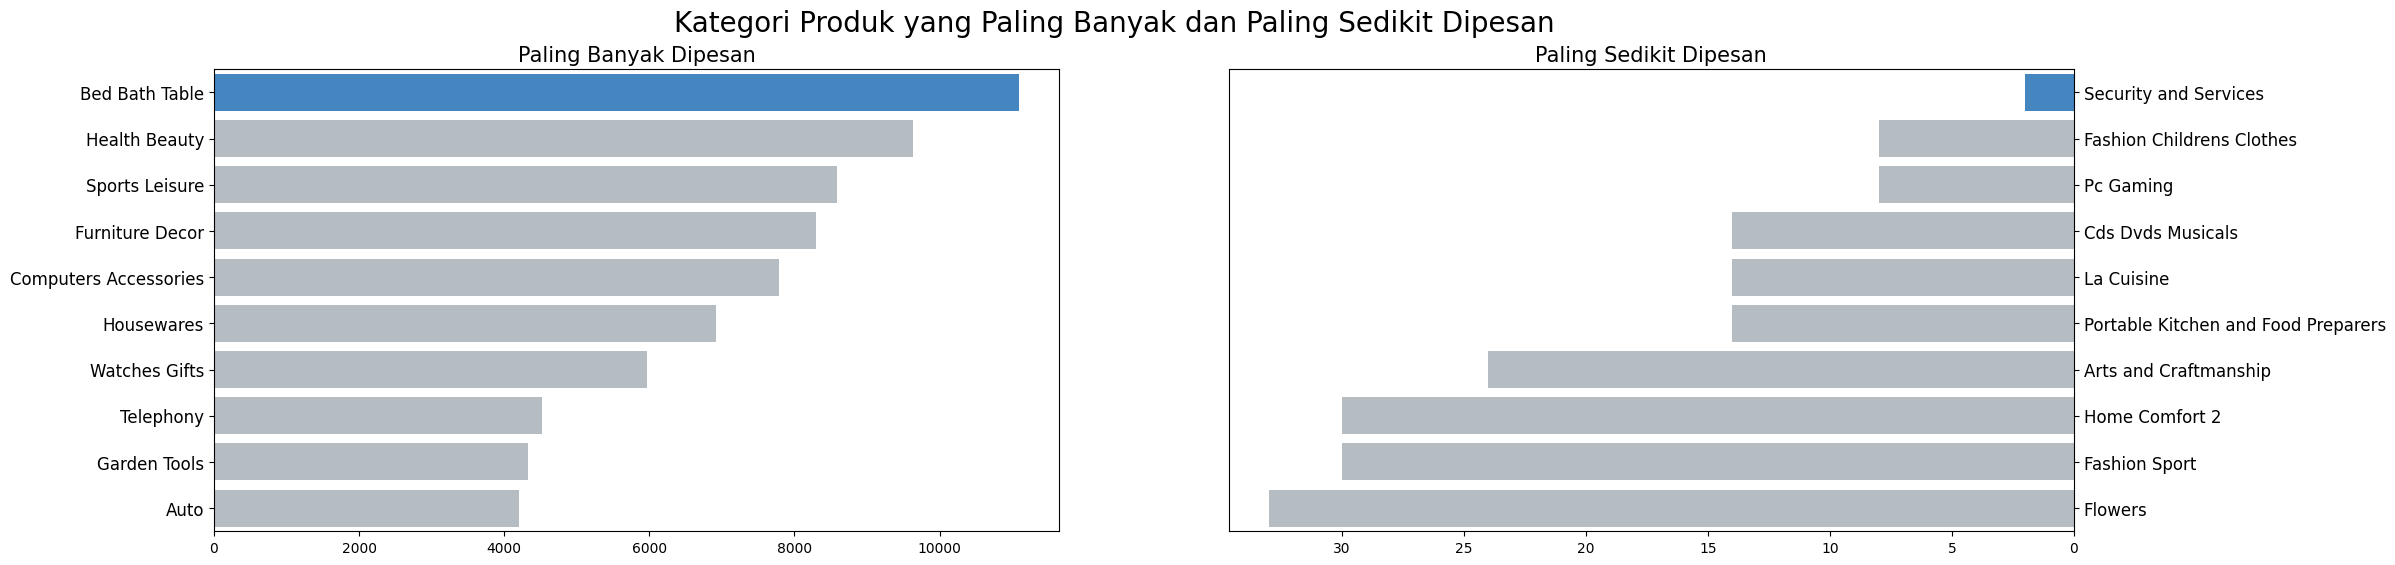

In [251]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]
sns.barplot(
    x="num_of_order",
    y="product_category",
    data= order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10),
    palette=colors,
    ax=ax[0]
    )
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Paling Banyak Dipesan", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x="num_of_order",
    y="product_category",
    data= order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=True).head(10),
    palette=colors,
    ax=ax[1]
    )
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Paling Sedikit Dipesan", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Kategori Produk yang Paling Banyak dan Paling Sedikit Dipesan", fontsize=20)
plt.show()

Kategori produk yang paling banyak dipesan yaitu Bed Bath Table, sebaliknya yaitu Security and Services yang paling sedikit dipesan.

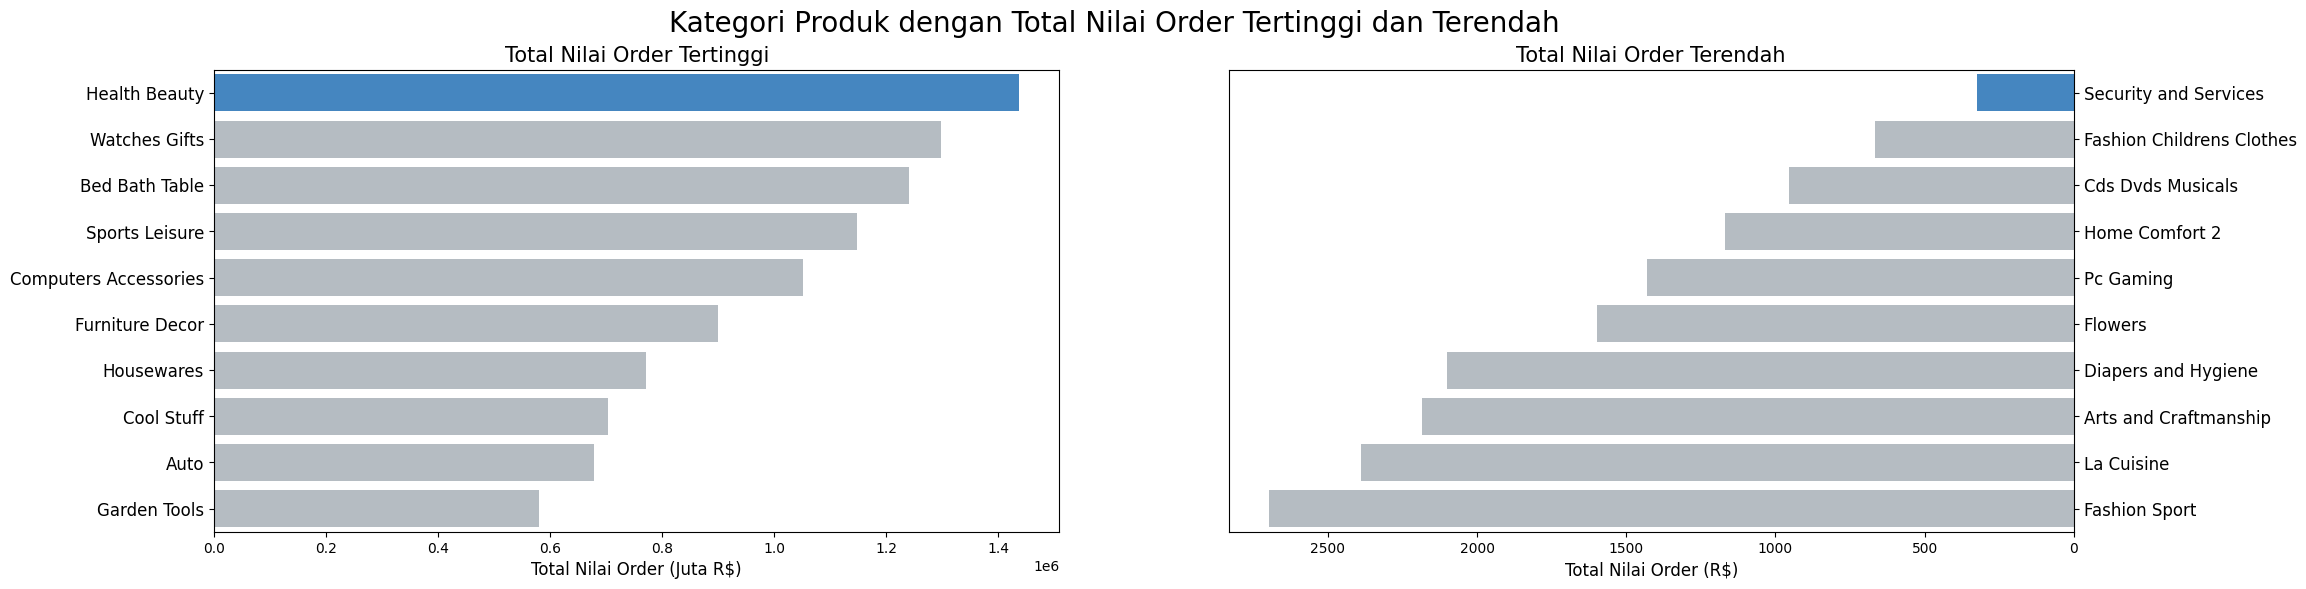

In [252]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]
sns.barplot(
    x="sum_order_value",
    y="product_category",
    data= order_by_product_category.sort_values(by='sum_order_value', ascending=False).head(10),
    palette=colors,
    ax=ax[0]
    )
ax[0].set_ylabel(None)
ax[0].set_xlabel('Total Nilai Order (Juta R$)', fontsize=12)
ax[0].set_title("Total Nilai Order Tertinggi", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x="sum_order_value",
    y="product_category",
    data= order_by_product_category.sort_values('sum_order_value', ascending=True).head(10),
    palette=colors,
    ax=ax[1]
    )
ax[1].set_ylabel(None)
ax[1].set_xlabel('Total Nilai Order (R$)', fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Total Nilai Order Terendah", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Kategori Produk dengan Total Nilai Order Tertinggi dan Terendah", fontsize=20)
plt.show()

Kategori produk yang memiliki total nilai order tertinggi yaitu Health Beauty, sebaliknya yaitu Security and Services yang memiliki total nilai order terendah.

### Bagaimana karakteristik dan perkembangan order pelanggan dari waktu ke waktu?

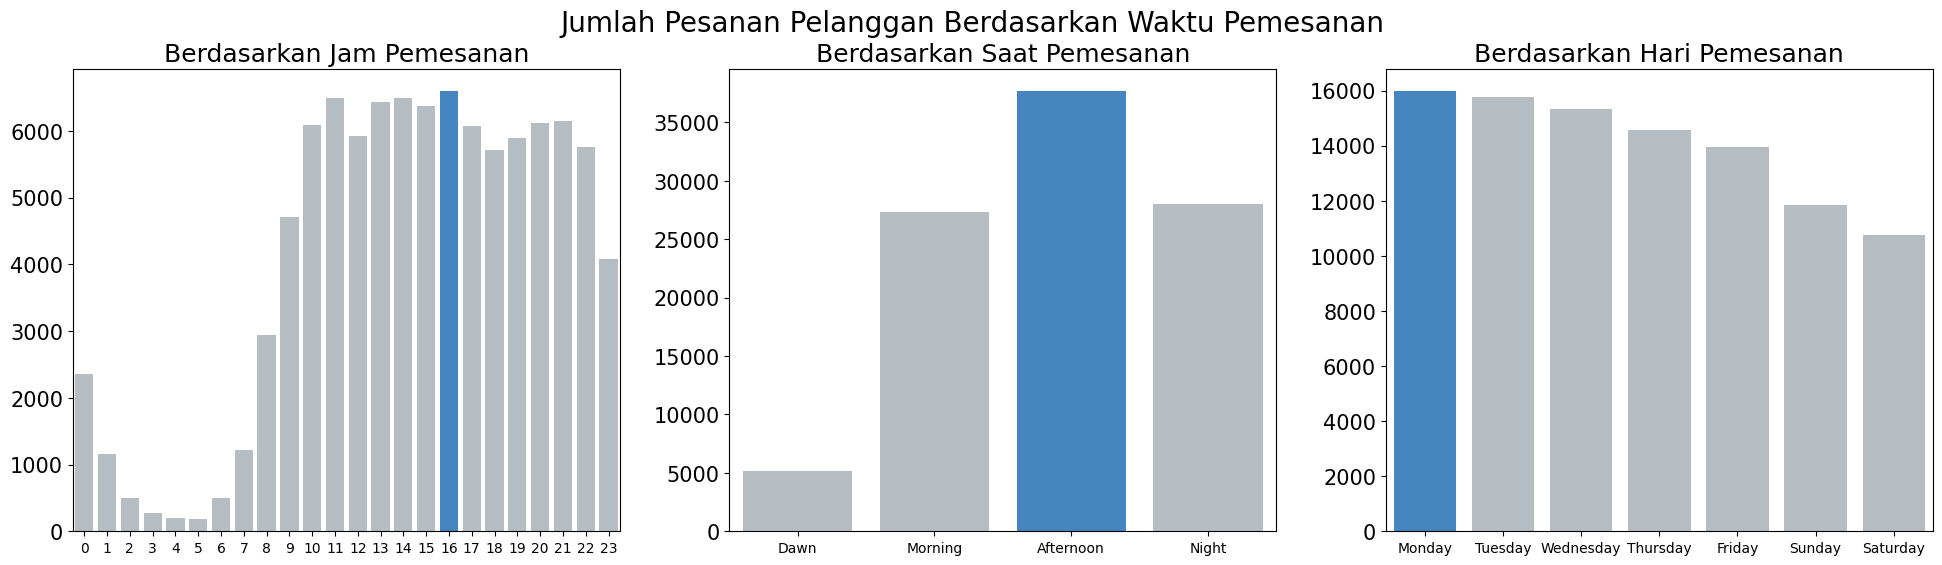

In [253]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="hour_order",
            y="order_id",
            data= count_hour_order,
            palette= set_custom_palette(count_hour_order.order_id),
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Jam Pemesanan", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="daytime_order",
            y="order_id",
            data= all_joined_df.groupby('daytime_order').order_id.nunique().reset_index(),
            palette= set_custom_palette(count_daytime_order.order_id),
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Saat Pemesanan", loc="center", fontsize=18)
ax[1].tick_params(axis ='y', labelsize=15)

sns.barplot(x="day_order",
            y="order_id",
            data= all_joined_df.groupby('day_order').order_id.nunique().reset_index().sort_values(by='order_id',ascending=False),
            palette=colors,
            ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Hari Pemesanan", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=15)

plt.suptitle("Jumlah Pesanan Pelanggan Berdasarkan Waktu Pemesanan", fontsize=20)
plt.show()

Pemesanan terbanyak berdasarkan jam pemesanan yaitu pada saat pukul 16.00, lalu berdasarkan saat pemesanan yaitu pada siang hari, dan berdasarkan hari pemesanan yaitu  pada hari Senin.

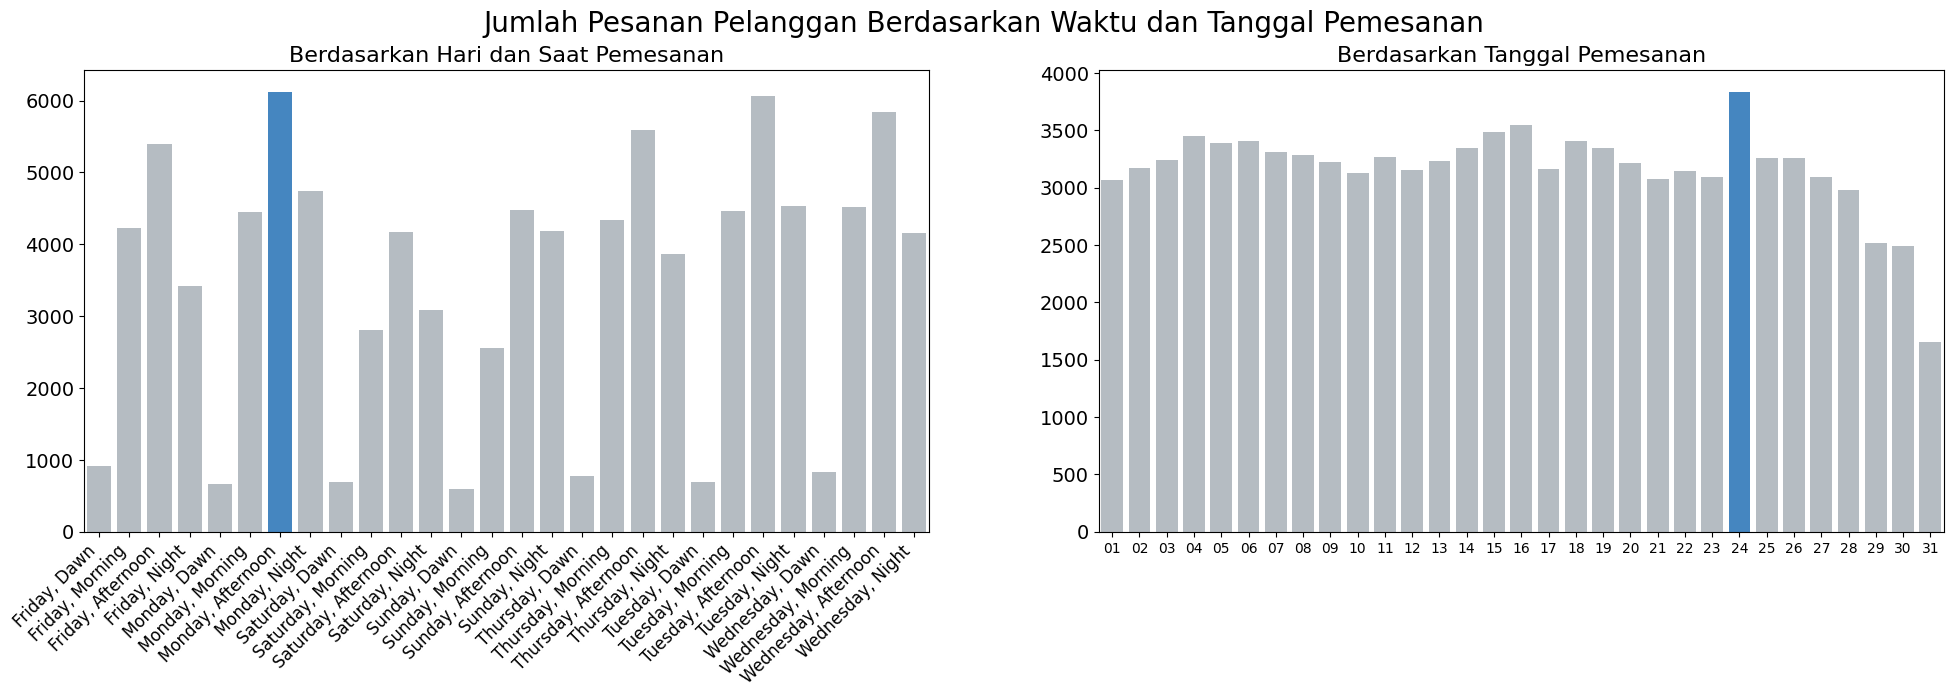

In [254]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="time_order",
            y="order_id",
            data= count_time_order,
            palette= set_custom_palette(count_time_order.order_id),
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Hari dan Saat Pemesanan", loc="center", fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
ax[0].tick_params(axis ='y', labelsize=14)

sns.barplot(x="date_order",
            y="order_id",
            data= count_date_order,
            palette= set_custom_palette(count_date_order.order_id),
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Tanggal Pemesanan", loc="center", fontsize=16)
ax[1].tick_params(axis ='y', labelsize=14)

plt.suptitle("Jumlah Pesanan Pelanggan Berdasarkan Waktu dan Tanggal Pemesanan", fontsize=20)
plt.show()

Pemesanan terbanyak berdasarkan waktu pemesanan yaitu pada hari Senin di siang hari, serta berdasarkan tanggal pemesanan yaitu pada tanggal 24.

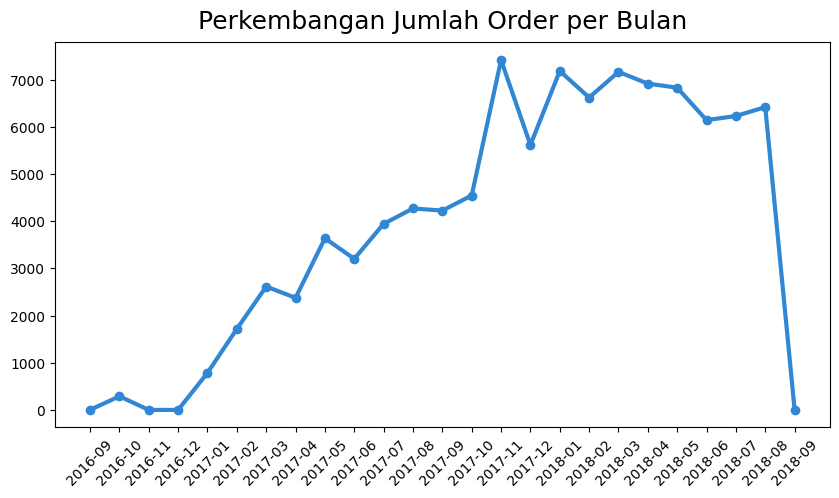

In [255]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders.month_order,
    monthly_orders.count_order,
    marker= 'o',
    linewidth= 3,
    color= "#3187d4"
    )
plt.title("Perkembangan Jumlah Order per Bulan" , loc="center", fontsize=18, pad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.show()

Jumlah order per bulan mengalami perkembangan dengan nilai tertingginya terjadi pada bulan November 2017, setelah bulan tersebut mengalami fluktuasi cenderung stabil hingga Agustus 2018.

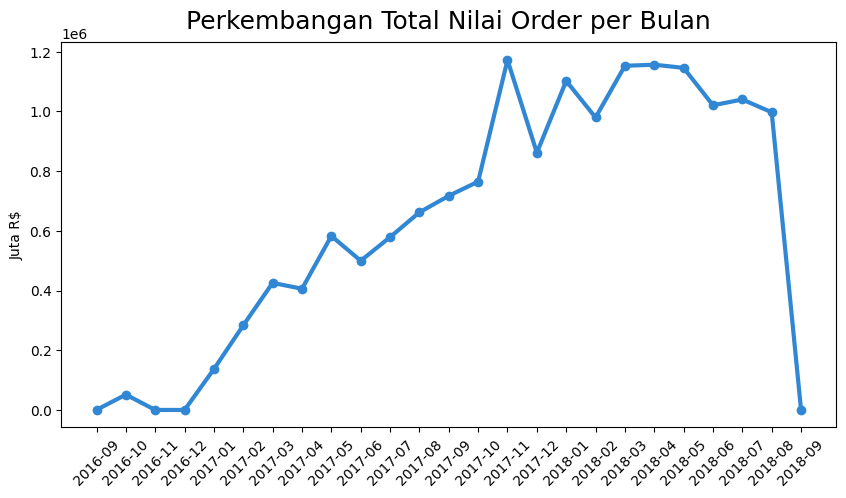

In [256]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders.month_order,
    monthly_orders.sum_order_value,
    marker= 'o',
    linewidth= 3,
    color= "#3187d4"
    )
plt.title("Perkembangan Total Nilai Order per Bulan" , loc="center", fontsize=18, pad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.ylabel('Juta R$', fontsize=10)

plt.show()

Sama halnya dengan jumlah order per bulan, total nilai order pun mengalami perkembangan dengan nilai tertingginya terjadi pada bulan November 2017, setelah bulan tersebut mengalami fluktuasi cenderung stabil hingga Agustus 2018.

### Pelanggan mana yang merupakan pelanggan terbaik, serta bagaimana segmentasi pada pelanggan berdasarkan pesanan terakhirnya, frekuensi order, dan total nilai ordernya?

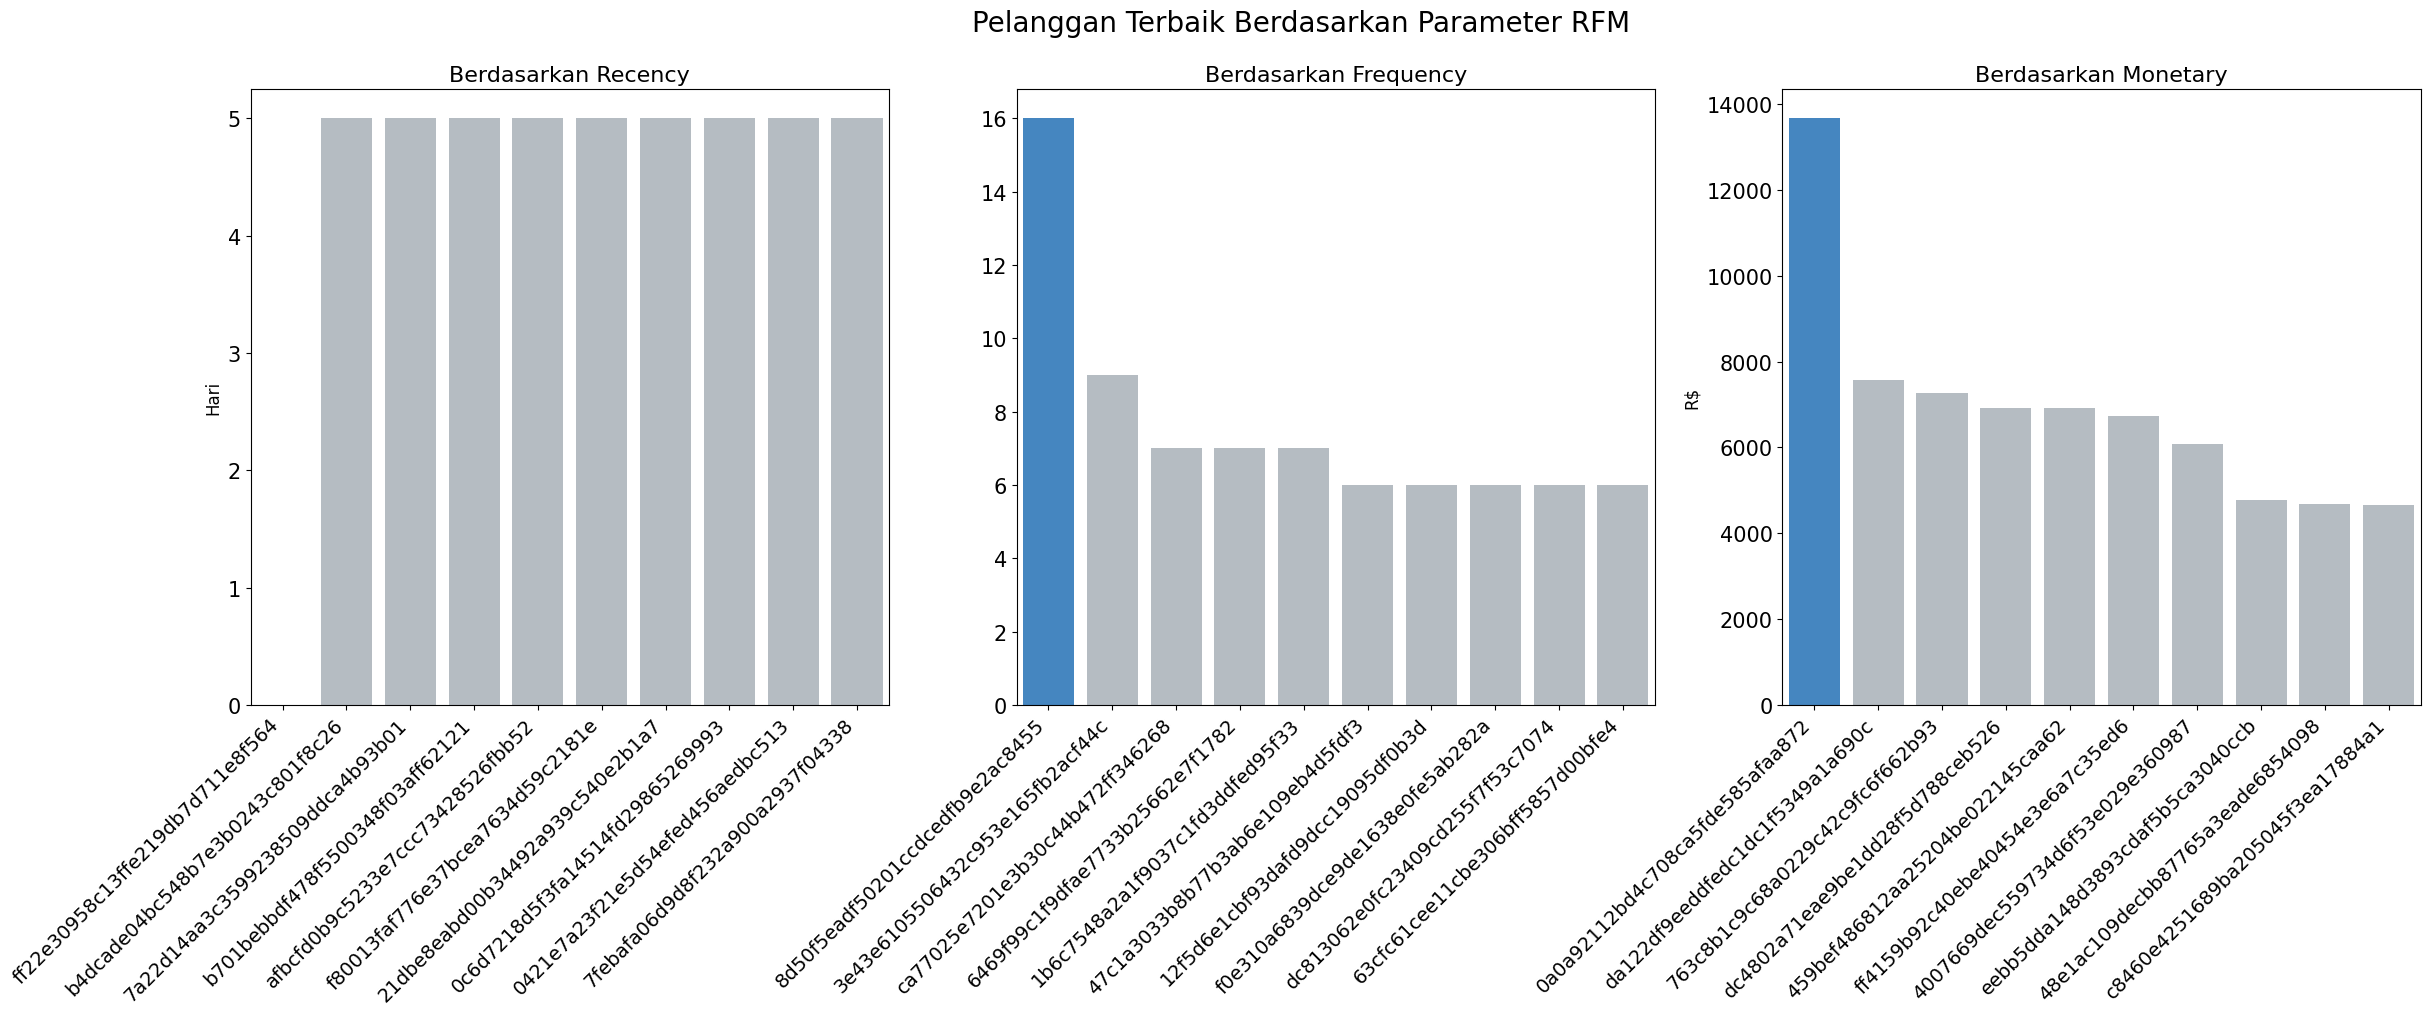

In [257]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))
colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="customer_unique_id", y="recency", data= rfm_df.sort_values(by='recency', ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel('Hari', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency", loc="center", fontsize=16)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="frequency", data= rfm_df.sort_values(by='frequency', ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=16)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="monetary", data= rfm_df.sort_values(by='monetary', ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel('R$', fontsize=12)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=16)
ax[2].tick_params(axis ='y', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.show()

Pelanggan terbaik berdasarkan hari terakhir order (recency) yaitu pelanggan dengan ID ff22e30958c13ffe219db7d711e8f564, lalu berdasarkan seberapa seringnya order (frequency) yaitu pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455, sedangkan berdasarkan seberapa besar uang yang dihabiskan (monetary) yaitu pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872.

In [258]:
#Memberikan ranking pada pelanggan berdasarkan skor recency, frequency, dan monetary
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)

#Normalisasi ranking pelanggan
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,76.165735,48.480781,48.480781
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,75.137656,48.480781,48.480781
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3.562743,48.480781,48.480781
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,28.749882,48.480781,48.480781
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,33.756041,48.480781,48.480781


In [259]:
#Membuat RFM Score dengan weighted value
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm'] + 0.28 *rfm_df['F_rank_norm'] + 0.57*rfm_df['M_rank_norm'] #Weighting pada masing-masing parameter
rfm_df['RFM_Score'] = (0.05*rfm_df['RFM_Score']).round(2) #Mengubah nilai RFM Score menjadi nilai dengan maksimal 5 dan membulatkannya hingga 2 desimal

rfm_df = rfm_df[['customer_unique_id', 'recency',	'frequency',	'monetary',	'RFM_Score']]
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,2.63
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,2.62
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2.09
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2.28
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2.31


In [260]:
#Memberikan rating pada pelanggan berdasarkan RFM Score
'''
RFM Score > 4.5 : Top Customer
4.5 > RFM Score > 4 : High Value Customer
4> RFM Score > 3 : Medium Value Customer
3> RFM Score > 1.6 : Low Value Customer
RFM Score <1.6 : Lost Customer
'''
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_Score'] > 4.5, "Top Customer", (np.where(
        rfm_df['RFM_Score'] > 4, "High Value Customer",(np.where(
            rfm_df['RFM_Score'] > 3, "Medium Value Customer", np.where(
                rfm_df['RFM_Score'] > 1.6, 'Low Value Customer', 'Lost Customer')))))
)

rfm_df.head(10)

<ipython-input-260-ff39f6f4455f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df["customer_segment"] = np.where(


,customer_unique_id,recency,frequency,monetary,RFM_Score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,2.63,Low Value Customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,2.62,Low Value Customer
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2.09,Low Value Customer
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2.28,Low Value Customer
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2.31,Low Value Customer
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,166.98,2.57,Low Value Customer
6,00050ab1314c0e55a6ca13cf7181fecf,136,1,35.38,2.59,Low Value Customer
7,00053a61a98854899e70ed204dd4bafe,187,1,419.18,2.50,Low Value Customer
8,0005e1862207bf6ccc02e4228effd9a0,548,1,150.12,2.08,Low Value Customer
9,0005ef4cd20d2893f0d9fbd94d3c0d97,175,1,129.76,2.52,Low Value Customer


In [261]:
#Melihat Pembagian Segmen Pelanggan Berdasarkan RFM Score
rfm_df.customer_segment.value_counts()

Low Value Customer     92096
Top Customer            1767
High Value Customer     1120
Name: customer_segment, dtype: int64

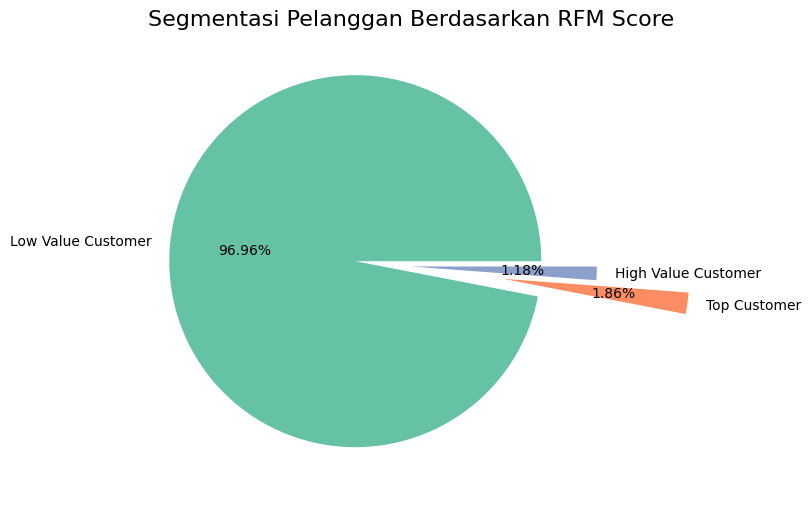

In [262]:
plt.figure(figsize=(6,8))
plt.pie(
    rfm_df.customer_segment.value_counts(),
    labels= rfm_df.customer_segment.value_counts().index,
    autopct= '%1.2f%%',
    explode = [0.3, 0.5, 0],
    colors= sns.color_palette('Set2')
)
plt.title("Segmentasi Pelanggan Berdasarkan RFM Score", loc='center', fontsize=16)
plt.show()


Berdasarkan hasil analisis RFM, sebagian besar pelanggan berada pada segmen Low Value Customer dengan persentase sebesar 96,96%, yang sisanya diikuti oleh pelanggan Top Customer dan High Value Customer.

In [263]:
#Melihat pelanggan yang memiliki RFM Score dan Monetary Score tertinggi
rfm_df.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(20)

,customer_unique_id,recency,frequency,monetary,RFM_Score,customer_segment
81925,dc813062e0fc23409cd255f7f53c7074,11,6,1033.62,5.00,Top Customer
52352,8d50f5eadf50201ccdcedfb9e2ac8455,14,16,902.04,4.99,Top Customer
92332,f8bc1d81f395f6239a2a5ab1b9edf1ab,14,3,515.10,4.99,Top Customer
58244,9cc5a07f169a1606fd347a56683e6ea6,12,4,419.25,4.99,Top Customer
45118,795c1622cf7a53d63d324e862349d01c,17,4,354.23,4.99,Top Customer
81851,dc48b0a1b0e6abb6586f322c189f6b93,14,3,327.39,4.99,Top Customer
19638,34b0cd95480e55c2a701293a2b9671b3,6,3,295.57,4.99,Top Customer
85151,e53fd5575f1418397aae732c5755b6fc,14,3,132.03,4.99,Top Customer
83403,e0836a97eaae86ac4adc26fbb334a527,7,3,88.27,4.99,Top Customer
29646,4facc2e6fbc2bffab2fea92d2b4aa7e4,21,4,1760.75,4.98,Top Customer


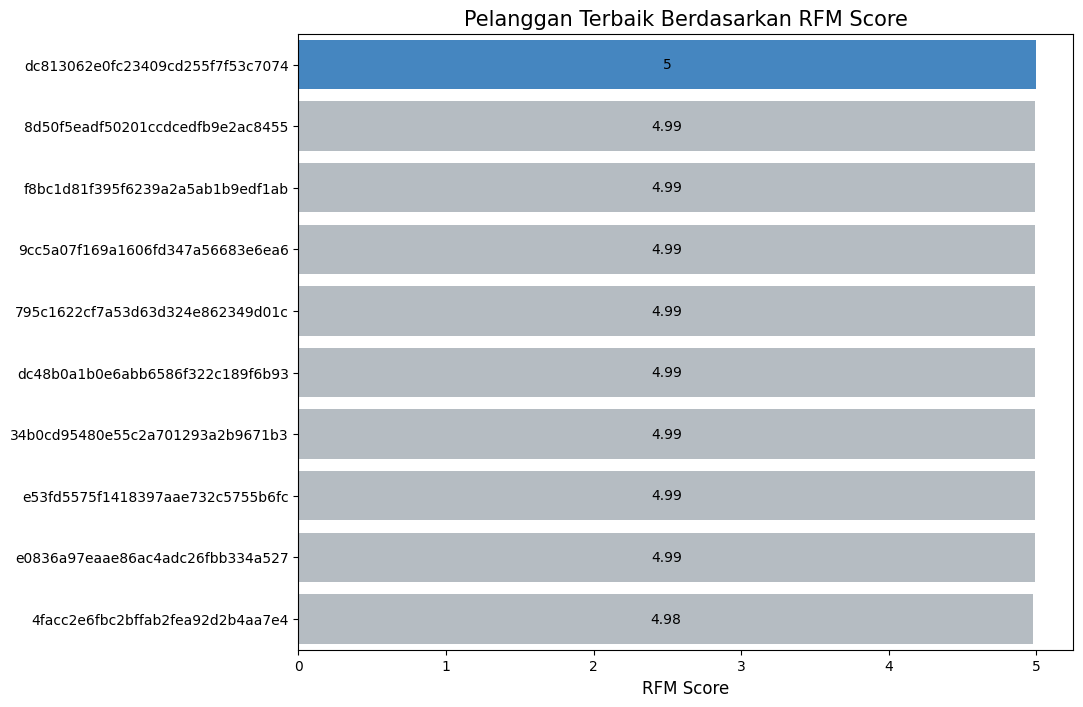

In [264]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="RFM_Score", y="customer_unique_id", data= rfm_df.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(10), palette=colors)
ax.set_ylabel(None)
ax.set_xlabel('RFM Score', fontsize=12)
ax.set_title("Pelanggan Terbaik Berdasarkan RFM Score", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

Pelanggan dengan ID dc813062e0fc23409cd255f7f53c7074 merupakan pelanggan terbaik yang memiliki RFM Score yang tertinggi

## Conclusion

1. Bagaimana penyebaran dari pelanggan berdasarkan kota dan negara bagian, serta pelanggan mana yang paling sering melakukan order?
> Pelanggan yang melakukan transaksi paling banyak berasal dari kota Sao Paulo dan Rio de Janeiro, serta dari negara bagian Sao Paulo dan Rio de Janeiro. Pelanggan yang paling sering melakukan order yaitu pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 dengan frekuensi order sebanyak 16 kali dan pelanggan yang menghabiskan uang paling banyak untuk order yaitu pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872 dengan total nilai order sebesar 13.664,1 Real.
---

2. Bagaimana penyebaran dari penjual berdasarkan kota dan negara bagian, serta penjual mana yang menjual produk paling banyak?
> Penjual paling banyak berasal dari kota Sao Paulo, Curitiba, dan Rio de Janeiro, serta dari negara bagian Sao Paulo, Parana, dan Minas Gerais. Penjual yang paling sering mendapat order yaitu penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 yang mendapatkan order sebanyak 1.847 kali dan penjual dengan total nilai order tertinggi yatiu penjual dengan ID 4869f7a5dfa277a7dca6462dcf3b52b2 yang memiliki total nilai order sebesar 249.393 Real
---

3. Kategori produk apa saja yang paling banyak dan yang paling sedikit dipesan?
> Berdasarkan jumlah ordernya, kategori produk yang paling banyak dipesan yaitu Bed Bath Table, Health Beauty, dan Sports Leisure, sedangkan yang paling sedikit dipesan yaitu Security and Services, Pc Gaming, dan Fashion Childrens Clothes. Sementara itu, apabila berdasarkan total nilai ordernya, kategori produk dengan total nilai order tertinggi yaitu Health Beauty, Watches Gifts, dan Bed Bath Table, sedangkan kategori produk dengan total nilai order terendah yaitu Security and Services, Fashion Childrens Clothes, dan Cds Dvds Musicals.
---

4. Bagaimana karakteristik dan perkembangan order pelanggan dari waktu ke waktu?
> Pemesanan terbanyak berdasarkan jam pemesanan yaitu pada saat pukul 16.00, lalu berdasarkan waktu pemesanan paling banyak dilakukan pada hari Senin siang, dan berdasarkan tanggal pemesanan paling banyak dilakukan pada tanggal 24 setiap bulannya. Jumlah order dan total nilai order mengalami perkembangan dengan nilai tertingginya terjadi pada bulan November 2017, setelah bulan tersebut mengalami fluktuasi cenderung stabil hingga Agustus 2018.
---


5. Pelanggan mana yang merupakan pelanggan terbaik, serta bagaimana segmentasi pada pelanggan berdasarkan pesanan terakhirnya, frekuensi order, dan total nilai ordernya?
> Berdasarkan hasil analisis RFM, pelanggan terbaik menurut RFM Score tertinggi yaitu pelanggan dengan ID dc813062e0fc23409cd255f7f53c7074. Selanjutnya segmentasi pelanggan dilihat dari kapan terakhir order, frekuensi order, dan total nilai ordernya, dimana terdapat 96,96% pelanggan yang tergolong ke dalam segmen Low Value Customer, lalu sebanyak 1,86% pelanggan tergolong ke dalam segmen Top Customer, dan sebanyak 1,18% pelanggan tergolong ke dalam segmen High Value Customer dari total pelanggan sebanyak 94.983 orang.







In [265]:
#Mengubah data all_joined_df menjadi csv
all_joined_df.to_csv('main_data_for_dashboard.csv', index=False)